# Make a catalog to cross-match to for astrometry

Gaia does not seem to have enough stars, nor  does 2MASS

VVV does, but the matches aren't good enough, so we need to use our own...

In [1]:
import numpy as np

In [2]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
from astropy.table import Table
from astropy.io import fits
from astropy import wcs
from astropy.wcs import WCS
import regions
from astroquery.vizier import Vizier

In [3]:
from astropy.visualization import quantity_support

In [4]:
%matplotlib inline
import pylab as pl

In [5]:
basepath = '/orange/adamginsburg/jwst/brick/'

In [6]:
fov = regions.Regions.read(f'{basepath}/regions/nircam_brick_fov.reg')

In [7]:
coord = fov[0].center
height = fov[0].height
width = fov[0].width
height, width = width, height # CARTA wrote it wrong
coord, width, height

(<SkyCoord (ICRS): (ra, dec) in deg
     (266.53496367, -28.71007499)>,
 <Quantity 161.9038 arcsec>,
 <Quantity 391.024 arcsec>)

In [8]:
Gaia.ROW_LIMIT = 10000
rslt = Gaia.query_object_async(coordinate=coord, width=width, height=height)

INFO: Query finished. [astroquery.utils.tap.core]


In [9]:
gaiacrds = SkyCoord(rslt['ra'], rslt['dec'], frame='icrs')
len(gaiacrds)

306

In [10]:
regs = regions.Regions([regions.PointSkyRegion(crd) for crd in gaiacrds])

In [11]:
regs.write(f'{basepath}/regions/gaia_sources.reg', overwrite=True)

In [12]:
Vizier.find_catalogs('2MASS Point Source')

OrderedDict([('II/246', </>), ('II/281', </>), ('J/ApJS/184/138', </>)])

In [13]:
Vizier.ROW_LIMIT = 5e4

In [14]:
galnuc2019 = Vizier.query_region(coordinates=coord, width=width, height=height, catalog=['J/A+A/631/A20'])[0]
galnuc2019[:3]

RAJ2000,e_RAJ2000,DEJ2000,e_DEJ2000,RAJdeg,e_RAJdeg,DEJdeg,e_DEJdeg,RAHdeg,e_RAHdeg,DEHdeg,e_DEHdeg,RAKsdeg,e_RAKsdeg,DEKsdeg,e_DEKsdeg,Jmag,e_Jmag,Hmag,e_Hmag,Ksmag,e_Ksmag,iJ,iH,iKs
deg,arcsec,deg,arcsec,deg,arcsec,deg,arcsec,deg,arcsec,deg,arcsec,deg,arcsec,deg,arcsec,mag,mag,mag,mag,mag,mag,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,uint8,uint8,uint8
266.51151,0.000000000,-28.757747,0.000000000,266.51151,0.001987759,-28.757747,0.002155650,266.51151,0.001987759,-28.757747,0.002155650,266.51151,0.001987759,-28.757747,0.002155650,12.67029,0.00486,12.22915,0.01243,12.19240,0.01123,2,2,2
266.52640,0.001296887,-28.748615,0.001615686,266.52640,0.001919700,-28.748616,0.002009142,266.52640,0.001989142,-28.748614,0.002159149,266.52640,--,-28.748615,--,13.64379,0.00700,12.82945,0.01289,12.60900,0.01718,2,2,2
266.52081,0.000648459,-28.747770,0.000807829,266.52081,0.001160735,-28.747769,--,266.52081,--,-28.747770,--,266.52081,--,-28.747770,--,14.04259,0.00401,13.46765,0.01227,13.46750,0.01181,2,2,2


In [15]:
galnuc2021 = Vizier.query_region(coordinates=coord, width=width, height=height, catalog=['J/A+A/653/A133'])[0]
galnuc2021[:3]

RAJ2000,e_RAJ2000,DEJ2000,e_DEJ2000,Jmag,e_Jmag,Hmag,e_Hmag,Ksmag,e_Ksmag,FJH,FHK,AJ1JH,e_AJ1JH,AH1JH,e_AH1JH,AH1HK,e_AH1HK,AK1HK,e_AK1HK,AH2HK,e_AH2HK,AK2HK,e_AK2HK
deg,arcsec,deg,arcsec,mag,mag,mag,mag,mag,mag,,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
266.51151,0.000000000,-28.757747,0.000000000,12.67029,0.00486,12.22915,0.01243,12.19240,0.01123,1,1,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000
266.52640,0.001296887,-28.748615,0.001615686,13.64379,0.00700,12.82945,0.01289,12.60900,0.01718,1,1,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000
266.52081,0.000648459,-28.747770,0.000807829,14.04259,0.00401,13.46765,0.01227,13.46750,0.01181,1,1,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000


In [16]:
# FK5 because it says 'J2000' on the Vizier page (same as twomass)
galnuc2021_crds = SkyCoord(galnuc2021['RAJ2000'], galnuc2021['DEJ2000'], frame='fk5')

In [17]:
vvvdr2 = Vizier.query_region(coordinates=coord, width=width, height=height, catalog=['II/348/vvv2'])[0]
vvvdr2[:3]
len(vvvdr2)

4693

In [18]:
vvvdr2.write(f'{basepath}/regions/vvvdr2.fits', overwrite=True)

In [19]:
# FK5 because it says 'J2000' on the Vizier page (same as twomass)
vvvdr2_crds = SkyCoord(vvvdr2['RAJ2000'], vvvdr2['DEJ2000'], frame='fk5')

In [20]:
Vizier.ROW_LIMIT = 1e4
twomass = Vizier.query_region(coordinates=coord, width=width, height=height, catalog=['II/246'])[0]
twomass[:3]

RAJ2000,DEJ2000,_2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Qflg,Rflg,Bflg,Cflg,Xflg,Aflg
deg,deg,,mag,mag,mag,mag,mag,mag,,,,,,
float64,float64,str17,float32,float32,float32,float32,float32,float32,str3,str3,str3,str3,uint8,uint8
266.546943,-28.752007,17461126-2845072,14.314,--,13.123,0.103,10.854,--,UAU,020,010,000,0,0
266.543681,-28.762333,17461048-2845443,16.551,--,13.405,0.074,11.001,0.043,UBA,022,011,0c0,0,0
266.543638,-28.753548,17461047-2845127,17.043,--,14.264,--,13.001,0.114,UUB,002,003,00c,0,0


In [21]:
twomass.meta['description'] = '2MASS Point Source Catalog'

In [22]:
twomass.write(f'{basepath}/regions/twomass.fits', overwrite=True)

In [23]:
# FK5 because it says 'J2000' on the Vizier page
twomass_crds = SkyCoord(twomass['RAJ2000'], twomass['DEJ2000'], frame='fk5')

# Test cross-match (to be put in the pipeline when it works)

Work on June 28, 2023

previously had tried F212N, but now using F410M b/c that's our target reference catalog

(maybe F405N is better)


trying f405n...

In [24]:
from astropy.table import Table

In [208]:
filtername = 'f410m'
module = 'nrca'
catfile = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_cat.ecsv'
imfile = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_i2d.fits'
crowdcatfile = f'{basepath}/{filtername.upper()}/{filtername}_{module}_crowdsource_nsky0.fits'
cat = Table.read(catfile)
cat.write(catfile.replace('ecsv', 'fits'), overwrite=True) # for CARTA viewing
crowdcat = Table.read(crowdcatfile)
len(cat), len(crowdcat)

(6034, 74181)

In [185]:
cat[:3]

label,xcentroid,ycentroid,sky_centroid,aper_bkg_flux,aper_bkg_flux_err,aper30_flux,aper30_flux_err,aper50_flux,aper50_flux_err,aper70_flux,aper70_flux_err,aper_total_flux,aper_total_flux_err,aper30_abmag,aper30_abmag_err,aper50_abmag,aper50_abmag_err,aper70_abmag,aper70_abmag_err,aper_total_abmag,aper_total_abmag_err,aper30_vegamag,aper30_vegamag_err,aper50_vegamag,aper50_vegamag_err,aper70_vegamag,aper70_vegamag_err,aper_total_vegamag,aper_total_vegamag_err,CI_50_30,CI_70_50,CI_70_30,is_extended,sharpness,roundness,nn_label,nn_dist,isophotal_flux,isophotal_flux_err,isophotal_abmag,isophotal_abmag_err,isophotal_vegamag,isophotal_vegamag_err,isophotal_area,semimajor_sigma,semiminor_sigma,ellipticity,orientation,sky_orientation,sky_bbox_ll,sky_bbox_ul,sky_bbox_lr,sky_bbox_ur
,,,"deg,deg",Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,,,,,,,,,,,,,,,,,,,,,,,,pix,Jy,Jy,,,,,pix2,pix,pix,,deg,deg,"deg,deg","deg,deg","deg,deg","deg,deg"
int64,float64,float64,SkyCoord,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float32,int64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,SkyCoord,SkyCoord,SkyCoord,SkyCoord
1,1571.5853,5.6673,"266.5128769037203,-28.735338298846052",2.350425e-07,7.210779e-08,6.344599e-06,1.645047e-07,1.200682e-05,2.339658e-07,3.123288e-05,4.633509e-07,4.595294e-05,6.817282e-07,21.893990,0.027793,21.201430,0.020953,20.163470,0.015989,19.744217,0.015989,18.786350,0.027793,18.093790,0.020953,17.055830,0.015989,16.636577,0.015989,1.8924,2.6013,4.9228,False,0.651014,-0.628185,36,6.922937,5.048226e-05,4.724620e-07,19.642153,0.010114,16.534513,0.010114,29.0,2.694160,0.905679,0.663836,-19.082379,159.987864,"266.51283534467456,-28.735427754133244","266.51295489643644,-28.73542607288981","266.5128311905167,-28.735200624941136","266.5129507420188,-28.73519894370121"
2,1586.1330,8.5024,"266.51292874566576,-28.735083334360272",1.179718e-06,1.478996e-07,1.051026e-04,4.568770e-07,1.994615e-04,6.240255e-07,4.598891e-04,9.619099e-07,6.766349e-04,1.415258e-06,18.845966,0.004709,18.150352,0.003391,17.243367,0.002269,16.824114,0.002269,15.738326,0.004709,15.042712,0.003391,14.135727,0.002269,13.716474,0.002269,1.8978,2.3057,4.3756,False,0.631309,1.106741,1,14.821404,7.512447e-04,1.224030e-06,16.710546,0.001768,13.602906,0.001768,141.0,2.610204,2.418364,0.073496,-54.929317,124.140926,"266.5128308709668,-28.735183153464817","266.5131098244194,-28.735179230408708","266.5128254386356,-28.73488613836736","266.51310439129554,-28.73488221532197"
3,1530.4270,121.2815,"266.51519371660936,-28.736024980296726",4.222364e-06,6.072255e-07,2.627678e-05,8.826144e-08,7.350311e-05,1.485725e-07,7.625632e-04,6.610930e-07,1.121959e-03,9.726661e-07,20.351070,0.003641,19.234236,0.002192,16.694310,0.000941,16.275057,0.000941,17.243430,0.003641,16.126596,0.002192,13.586670,0.000941,13.167417,0.000941,2.7973,10.3746,29.0204,True,0.413865,-0.039207,201,59.234175,2.234079e-01,1.037093e-05,10.527254,0.000050,7.419614,0.000050,55075.0,117.027303,49.561513,0.576496,-13.770344,165.299899,"266.51293664780553,-28.740966212090648","266.5180776426428,-28.74089381996","266.5127813420311,-28.732475074634003","266.5179219192219,-28.73240268817953"


In [186]:
crowdcat[:3]

x,y,flux,passno,dx,dy,dflux,qf,rchi2,fracflux,fluxlbs,dfluxlbs,fwhm,spread_model,dspread_model,fluxiso,xiso,yiso,sky,skycoord
,,,,,,,,,,,,,,,,,,,"deg,deg"
float64,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,SkyCoord
60.86339655518532,-0.499,163077.9,0.0,1e+20,1e+20,10000000000.0,0.0,0.0,0.0,0.0,0.0,2.7393563,0.0,0.0,0.0,0.0,0.0,14.472063,"266.5132368926485,-28.761734566919262"
67.94729162752628,2.0526938438415527,-106470.61,0.0,1e+20,1e+20,10000000000.0,0.0,0.0,0.0,0.0,0.0,2.7393558,0.0,0.0,0.0,0.0,0.0,14.472063,"266.5132854839277,-28.76161008571008"
102.43513560295105,-0.499,-70145.195,0.0,1e+20,1e+20,10000000000.0,0.0,0.0,0.0,0.0,0.0,2.7393563,0.0,0.0,0.0,0.0,0.0,14.835405,"266.51322360230057,-28.761008247427394"


In [187]:
skycrds_cat = cat['sky_centroid']
skycrds_crowdcat = crowdcat['skycoord']

In [188]:
idx, sidx, sep, sep3d = gaiacrds.search_around_sky(skycrds_cat, 0.2*u.arcsec)
crowdidx, crowdsidx, crowdsep, crowdsep3d = gaiacrds.search_around_sky(skycrds_crowdcat, 0.2*u.arcsec)

In [189]:
len(idx), len(crowdidx)

(51, 145)

In [190]:
dra = (skycrds_cat[idx].ra - gaiacrds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[idx].dec - gaiacrds[sidx].dec).to(u.arcsec)
crowddra = (skycrds_crowdcat[crowdidx].ra - gaiacrds[crowdsidx].ra).to(u.arcsec)
crowdddec = (skycrds_crowdcat[crowdidx].dec - gaiacrds[crowdsidx].dec).to(u.arcsec)

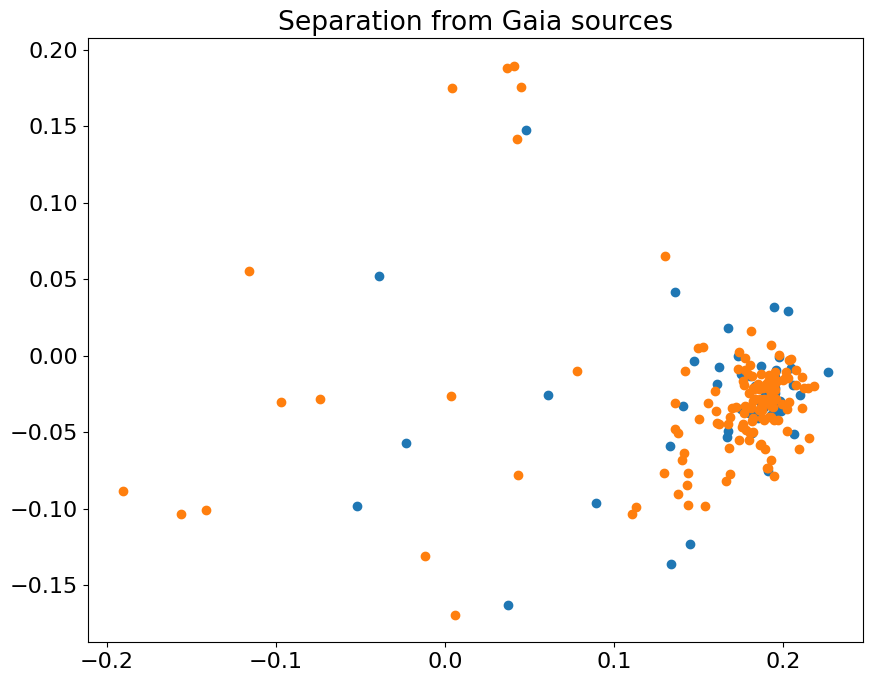

In [191]:
pl.title("Separation from Gaia sources")
pl.scatter(dra, ddec);
pl.scatter(crowddra, crowdddec);

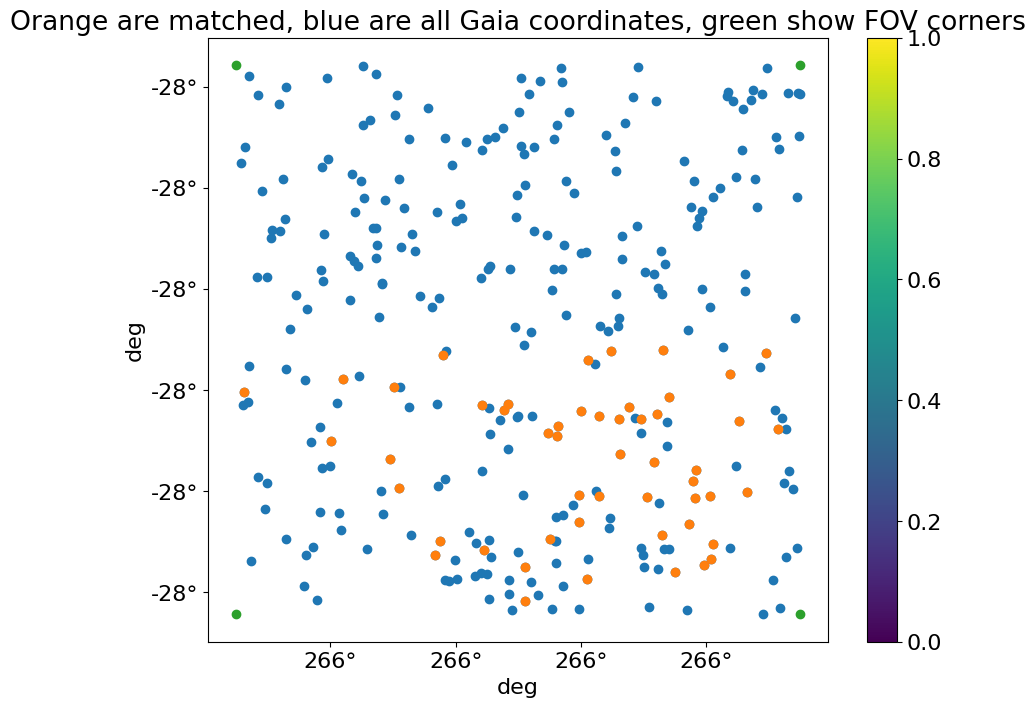

In [192]:
with quantity_support():
    pl.scatter(gaiacrds.ra, gaiacrds.dec)
    pl.scatter(gaiacrds.ra[sidx], gaiacrds.dec[sidx])
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()
    pl.title("Orange are matched, blue are all Gaia coordinates, green show FOV corners")

In [193]:
idx, sidx, sep, sep3d = twomass_crds.search_around_sky(skycrds_cat, 0.2*u.arcsec)

In [194]:
len(idx)

53

In [195]:
dra = skycrds_cat[idx].ra - twomass_crds[sidx].ra
ddec = skycrds_cat[idx].dec - twomass_crds[sidx].dec

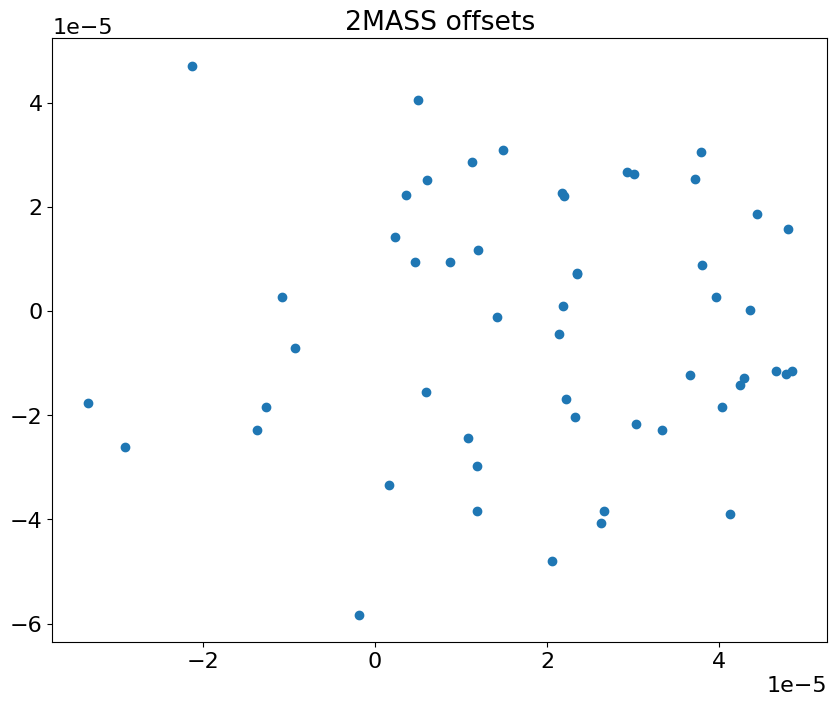

In [196]:
pl.title("2MASS offsets")
pl.scatter(dra, ddec);

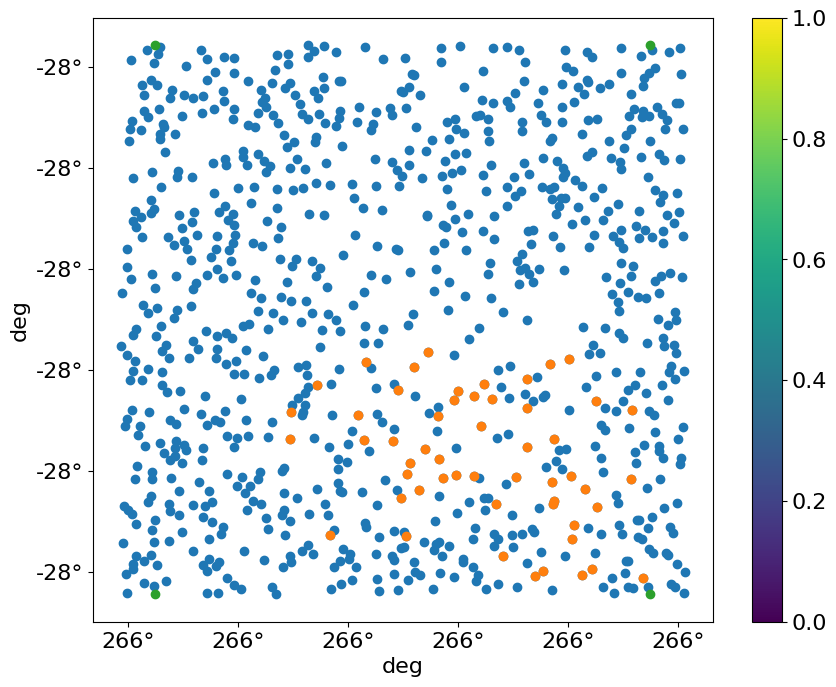

In [197]:
with quantity_support():
    pl.scatter(twomass_crds.ra, twomass_crds.dec)
    pl.scatter(twomass_crds.ra[sidx], twomass_crds.dec[sidx])
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()

In [198]:
idx, sidx, sep, sep3d = galnuc2021_crds.search_around_sky(skycrds_cat, 0.2*u.arcsec)

In [199]:
len(idx)

1259

In [200]:
dra = (skycrds_cat[idx].ra - galnuc2021_crds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[idx].dec - galnuc2021_crds[sidx].dec).to(u.arcsec)

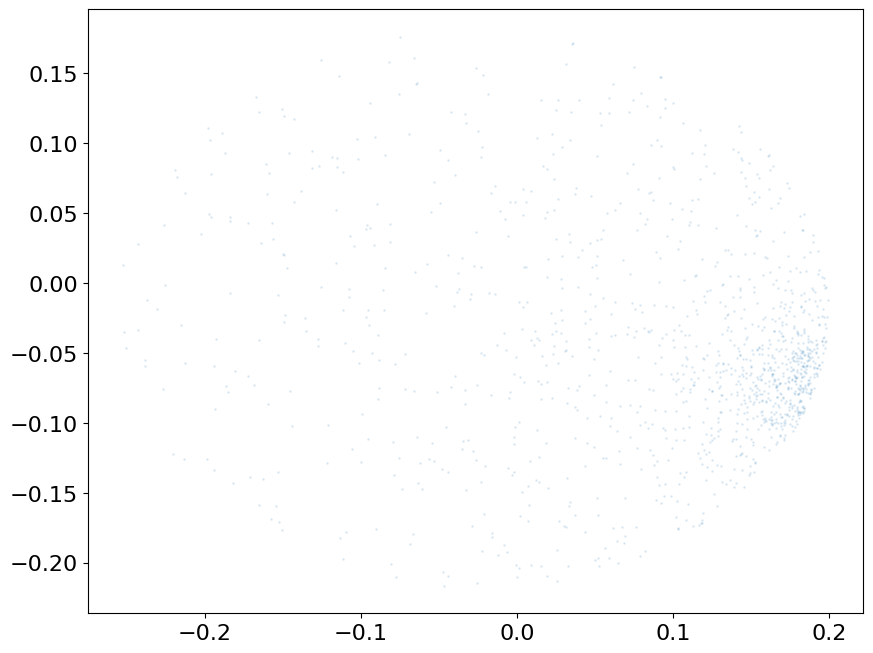

In [201]:
pl.scatter(dra, ddec, s=1, alpha=0.1)

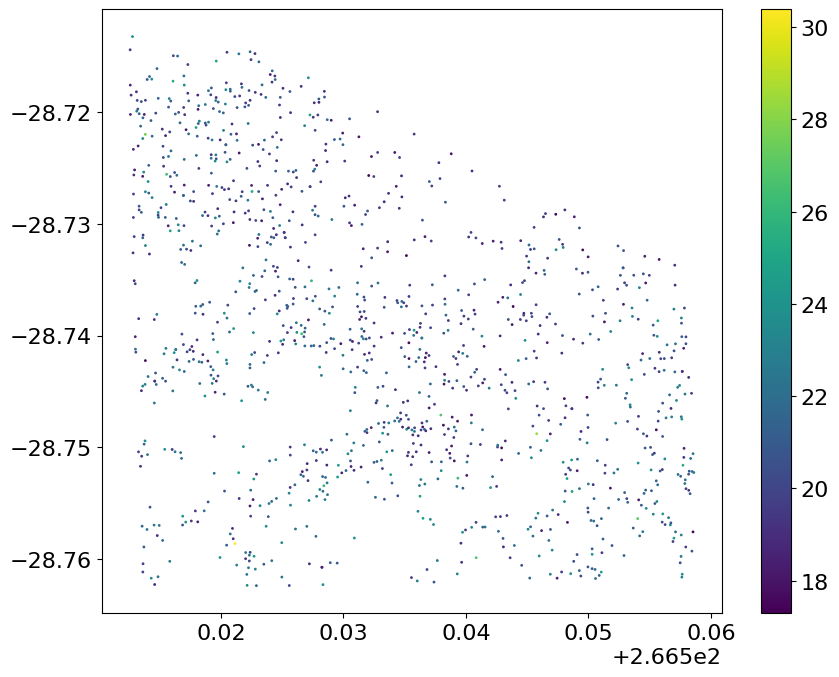

In [202]:
pl.scatter(skycrds_cat[idx].ra, skycrds_cat[idx].dec, c=cat['aper30_abmag'][idx], s=1)
pl.colorbar()

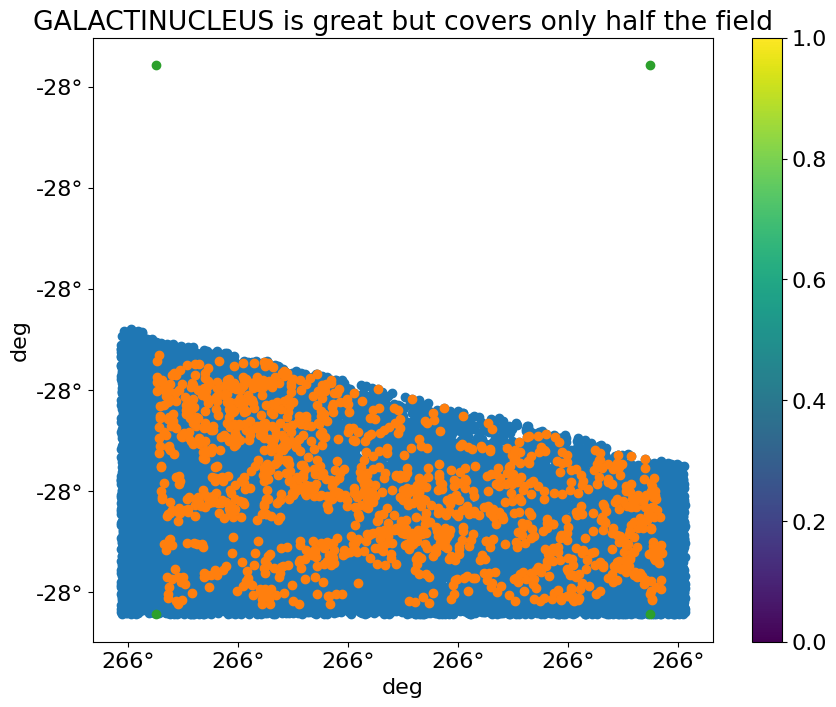

In [203]:
with quantity_support():
    pl.scatter(galnuc2021_crds.ra, galnuc2021_crds.dec)
    pl.scatter(galnuc2021_crds.ra[sidx], galnuc2021_crds.dec[sidx])
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()
    pl.title("GALACTINUCLEUS is great but covers only half the field")

# VVV offsets

I don't understand what I'm seeing here.  In the CARTA catalog overlay, the VVV sources are not offset (for f410m) - they are aligned with the data.  For F405N, the offset is clear

The crowdsource catalog is perfectly aligned.

How can there be an offset in this plot?

The original catalog (``_cat.ecsv``) is produced by the JWST pipeline.

In [211]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(skycrds_cat, 0.4*u.arcsec)
downsel = cat['aper_total_vegamag']<15
downselidx, downselsidx, downselsep, downselsep3d = vvvdr2_crds.search_around_sky(skycrds_cat[downsel], 0.4*u.arcsec)

crowdidx, crowdsidx, crowdsep, crowdsep3d = vvvdr2_crds.search_around_sky(skycrds_crowdcat, 0.4*u.arcsec)

In [212]:
len(idx), len(downselidx), len(crowdidx)

(978, 813, 3493)

In [206]:
dra = (skycrds_cat[idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)

crowddra = (skycrds_crowdcat[crowdidx].ra - vvvdr2_crds[crowdsidx].ra).to(u.arcsec)
crowdddec = (skycrds_crowdcat[crowdidx].dec - vvvdr2_crds[crowdsidx].dec).to(u.arcsec)

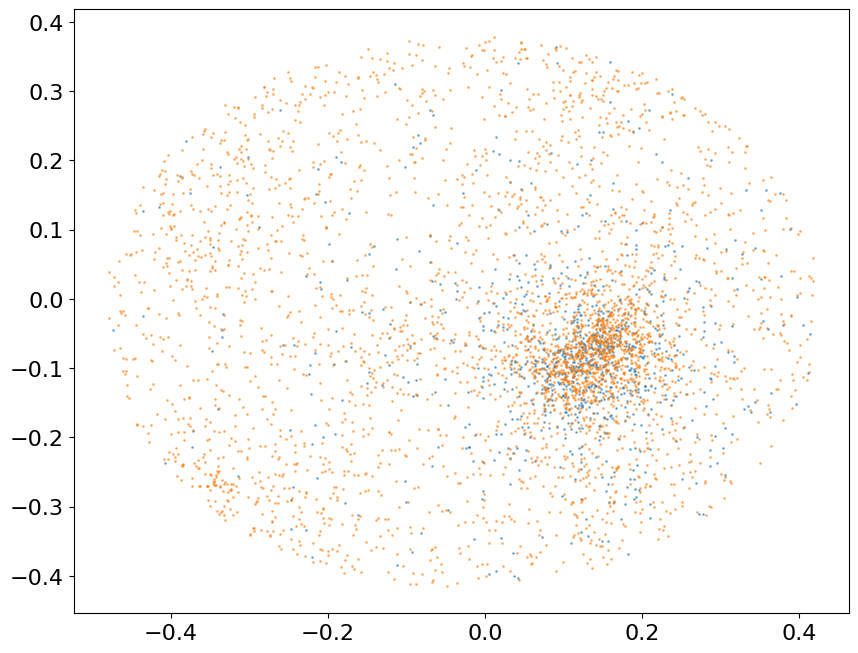

In [207]:
pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(crowddra, crowdddec, s=1, alpha=0.5)

In [215]:
downseldra = (skycrds_cat[downsel][downselidx].ra - vvvdr2_crds[downselsidx].ra).to(u.arcsec)
downselddec = (skycrds_cat[downsel][downselidx].dec - vvvdr2_crds[downselsidx].dec).to(u.arcsec)

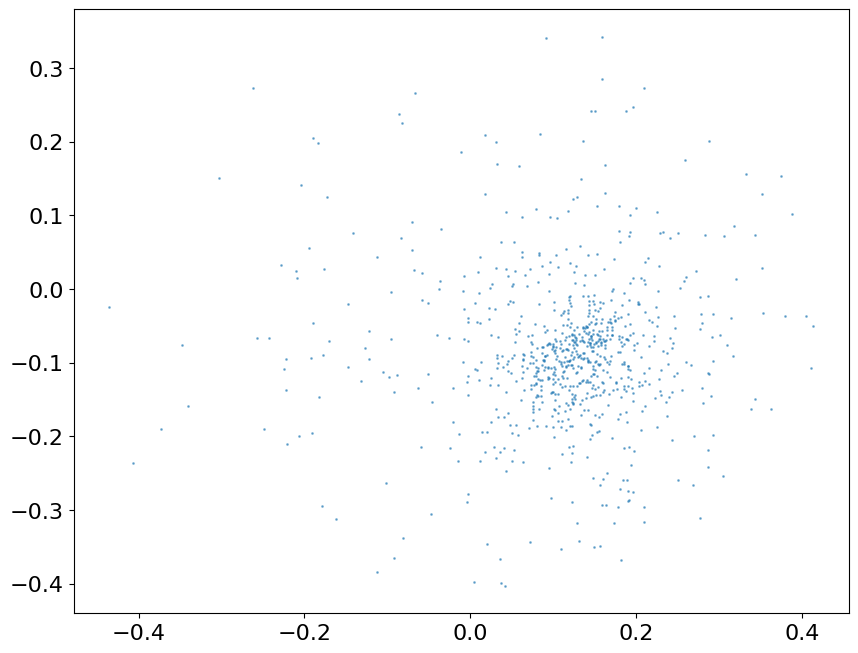

In [216]:
pl.scatter(downseldra, downselddec, s=1, alpha=0.5)
#pl.scatter(crowddra, crowdddec, s=1, alpha=0.5)

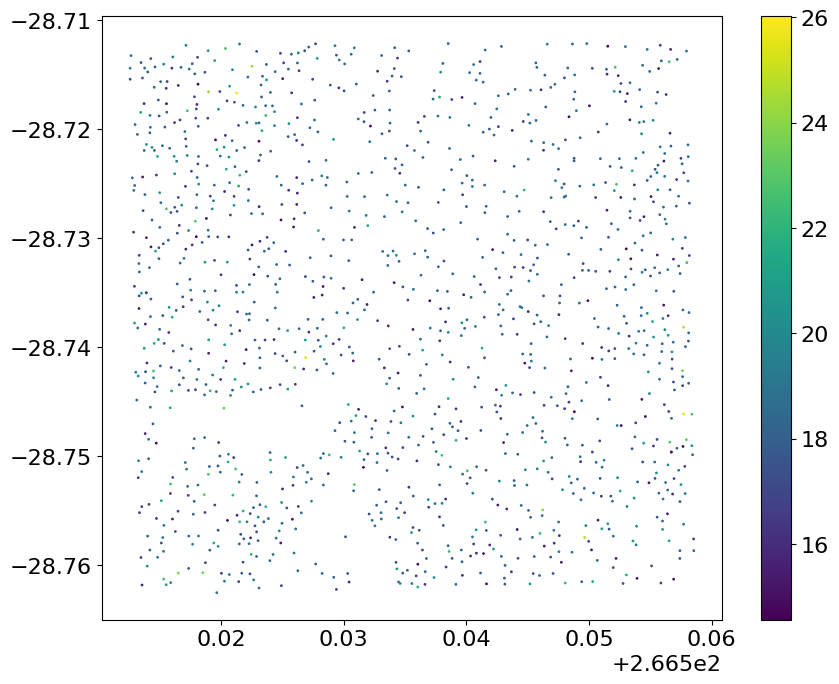

In [181]:
pl.scatter(skycrds_cat[idx].ra, skycrds_cat[idx].dec, c=cat['aper30_abmag'][idx], s=1)
pl.colorbar()

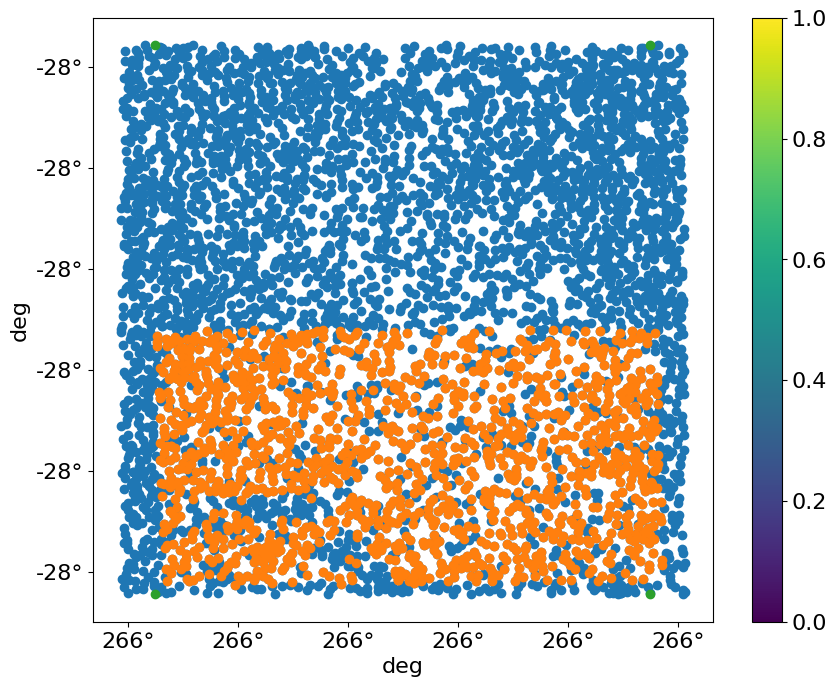

In [182]:
with quantity_support():
    pl.scatter(vvvdr2_crds.ra, vvvdr2_crds.dec)
    pl.scatter(vvvdr2_crds.ra[sidx], vvvdr2_crds.dec[sidx])
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()

# VVV

VVV looks pretty good superposed on the images.

The offset is generally <0.2 arcsec, often <0.1, but there's a systematic shift.

The flux range that matches is:

F187N : ~ 500 - 3000 MJy/sr

F182M, F212N: seems ~same-ish

Actually looks same-ish for the long wave too

Argh, what's the MJy/sr conversion?

In [50]:
from astropy.wcs import WCS
from astropy.io import fits

In [51]:
ww =  WCS(fits.getheader(imfile, ext=('SCI', 1)))
pixscale = ww.proj_plane_pixel_area()

Set OBSGEO-B to   -20.666215 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526468113.175 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [52]:
import numpy as np

## Approximate Jy/beam

In [53]:
(u.MJy/u.sr * (2*np.pi * (8*np.log(2)) * 2.5**2 * pixscale)).to(u.Jy)

<Quantity 5.03527529e-06 Jy>

but that doesn't seem to work.

Empirically,

8.5e-5 Jy -> 1933 MJy/sr
1.1e-5 Jy ->  165 MJy/sr
2.1e-5 Jy ->  350 MJy/sr

So there are ~70 nJy / (MJy/sr)

In [54]:
1.1e-5 / 165

6.666666666666667e-08

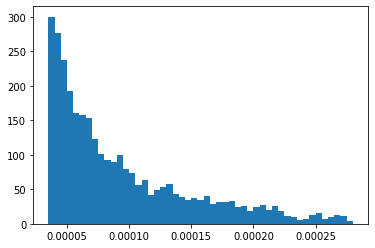

In [55]:
flux = (cat['aper30_abmag'].value * u.ABmag).to(u.Jy)
pl.hist(flux.value, bins=np.linspace(7e-8 * 500, 7e-8 * 4000))
sel = (flux > 7e-8*500*u.Jy) & (flux < 4000*7e-8*u.Jy)

In [56]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(skycrds_cat[sel], 0.4*u.arcsec)

In [57]:
len(idx)

889

In [58]:
dra = (skycrds_cat[sel][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[sel][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)

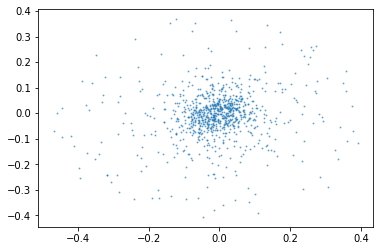

In [59]:
pl.scatter(dra, ddec, s=1, alpha=0.5)

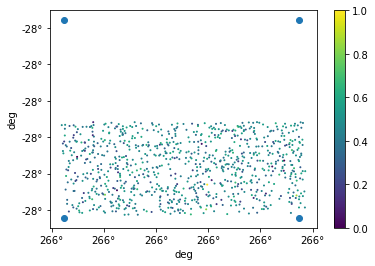

In [60]:
with quantity_support():
    pl.scatter(skycrds_cat[sel][idx].ra, skycrds_cat[sel][idx].dec, c=cat['aper30_abmag'][idx], s=1)
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()

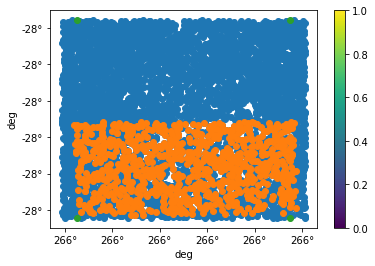

In [61]:
with quantity_support():
    pl.scatter(vvvdr2_crds.ra, vvvdr2_crds.dec)
    pl.scatter(vvvdr2_crds[sidx].ra, vvvdr2_crds[sidx].dec)
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()

In [62]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(skycrds_cat[sel], 0.4*u.arcsec)
dra = (skycrds_cat[sel][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[sel][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)
print(np.median(dra), np.median(ddec))

-0.00968108arcsec -0.00336964arcsec


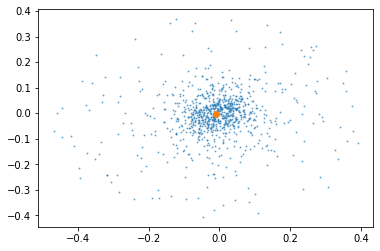

In [63]:
pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(np.median(dra), np.median(ddec))

In [64]:
ww =  WCS(fits.getheader(imfile, ext=('SCI', 1)))
ww.wcs.crval = ww.wcs.crval - [np.median(dra).to(u.deg).value, np.median(ddec).to(u.deg).value]
with fits.open(imfile, mode='update') as hdulist:
    print(hdulist[1].header['CRVAL1'],
          hdulist[1].header['CRVAL2'])
    hdulist[1].header.update(ww.to_header())
    print(hdulist[1].header['CRVAL1'],
          hdulist[1].header['CRVAL2'])

Set OBSGEO-B to   -20.666215 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526468113.175 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


266.53547908987 -28.73739742136
266.53548177906 -28.737396485348


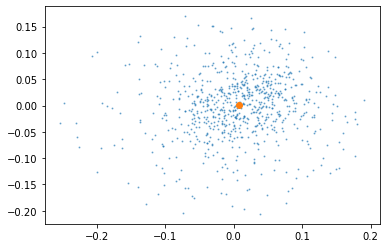

In [65]:
skycrds_cat_new = ww.pixel_to_world(cat['xcentroid'], cat['ycentroid'])

idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(skycrds_cat_new[sel], 0.2*u.arcsec)
dra = (skycrds_cat_new[sel][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat_new[sel][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)

pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(np.median(dra), np.median(ddec))

# Check what's happening in the overlap zones

In [66]:
from astropy import wcs

In [67]:
import regions
module_overlap = regions.Regions.read(f'{basepath}/regions/overlap_region.reg')
module_overlap

<Regions([<RectangleSkyRegion(center=<SkyCoord (ICRS): (ra, dec) in deg
    (266.535674, -28.71300934)>, width=11.3759 arcsec, height=150.5041 arcsec, angle=0.0 deg)>])>

In [68]:
import warnings

In [221]:
def check_overlap_zone(filtername = 'f212n'):
    fig = pl.figure(1, figsize=(10,5))
    pl.suptitle(filtername)
    
    ax1 = pl.subplot(1,2,1)
    ax2 = pl.subplot(1,2,2)

    for module in ('nrca', 'nrcb'):
        catfile = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_cat.ecsv'
        imfile = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_i2d.fits'
        imfile_realigned = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_realigned-to-refcat.fits'
        cat = Table.read(catfile)
        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            ww = wcs.WCS(fits.getheader(imfile_realigned, ext=('SCI', 1)))
        
        skycrds_cat = cat['sky_centroid']
        realigned_skycrds = ww.pixel_to_world(cat['xcentroid'], cat['ycentroid'])
        
        for crds, ax, title in [(skycrds_cat, ax1, 'original'),
                                (realigned_skycrds, ax2, 'realigned')]:
            ax.set_title(title)
            sel = module_overlap[0].contains(crds, ww)

            idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(crds, 0.3*u.arcsec)

            dra_all = (crds[idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
            ddec_all = (crds[idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)

            idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(crds[sel], 0.3*u.arcsec)

            dra = (crds[sel][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
            ddec = (crds[sel][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)

            ax.axhline(0, color='k', linestyle=':')
            ax.axvline(0, color='k', linestyle=':')
            ax.scatter(dra_all, ddec_all, s=1, alpha=0.2, label=module)
            ax.scatter(dra, ddec, s=3, alpha=0.5, marker='s', label=module)
            ax.scatter(np.median(dra), np.median(ddec), marker='x', s=100)
            ax.axis([-0.3, 0.3, -0.3, 0.3])
    return fig

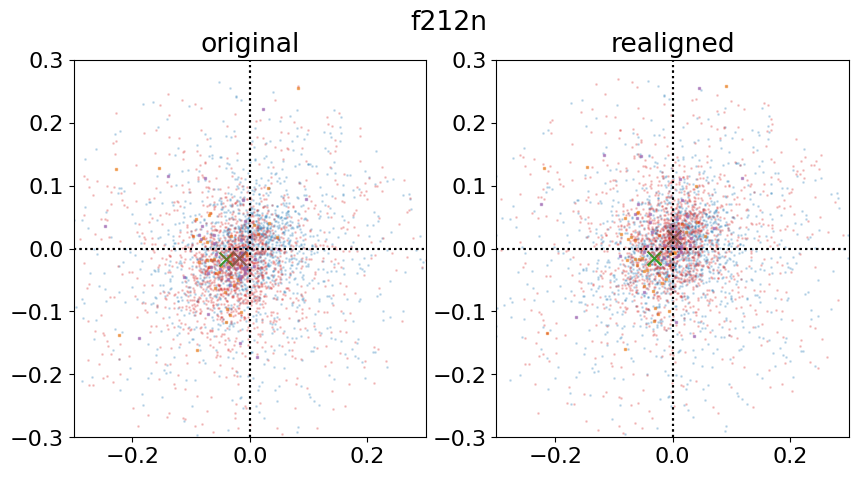

In [222]:
check_overlap_zone('f212n');

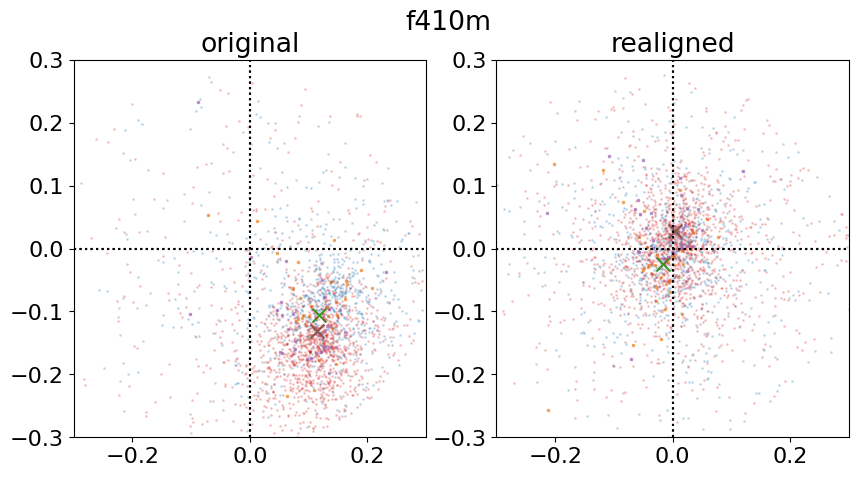

In [223]:
check_overlap_zone('f410m');

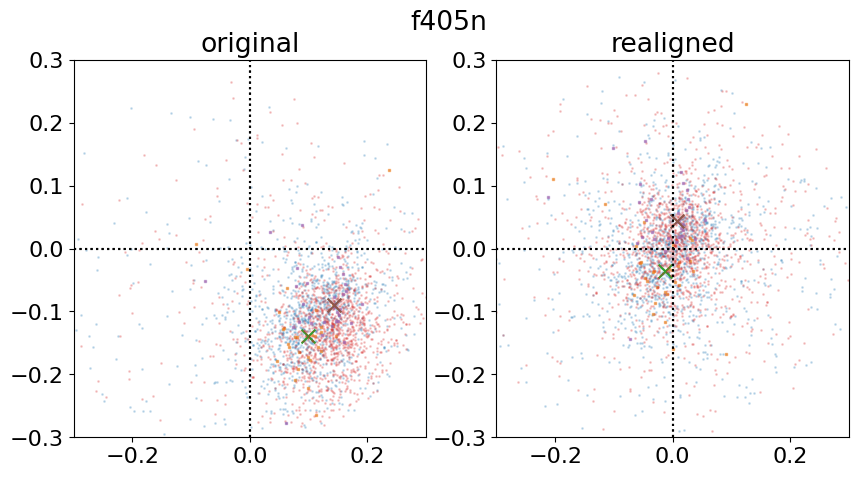

In [224]:
check_overlap_zone('f405n');

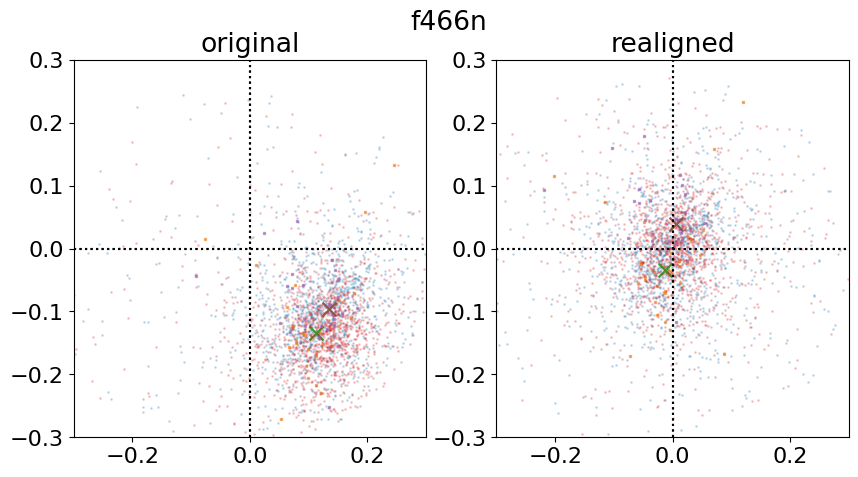

In [225]:
check_overlap_zone('f466n');

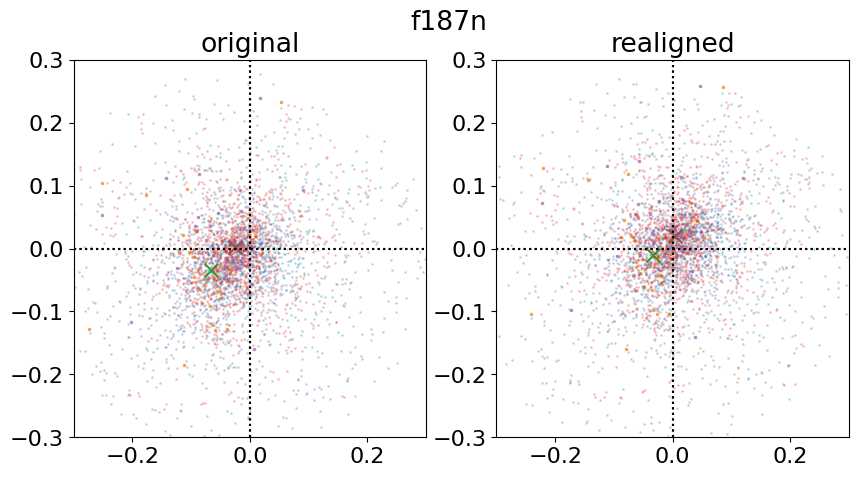

In [226]:
check_overlap_zone('f187n');

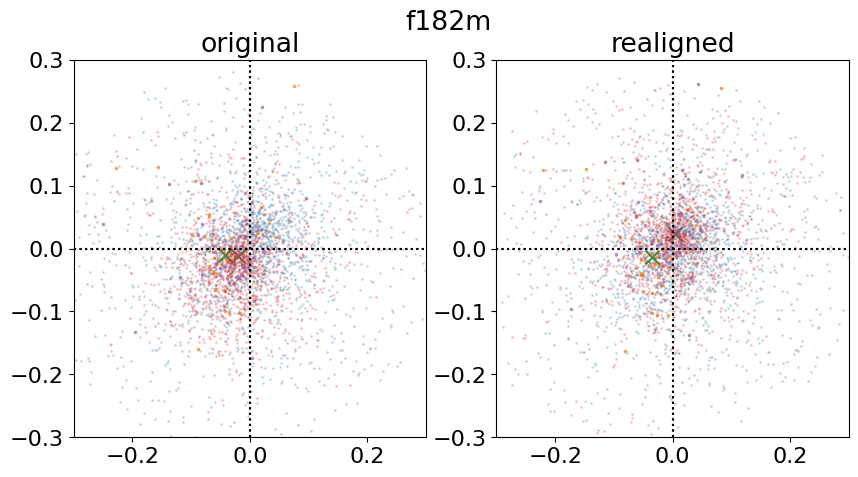

In [227]:
check_overlap_zone('f182m');

# "Production Run" test 

In [257]:
%run $basepath/reduction/align_to_catalogs.py

In [258]:
main()

2023-06-30 14:16:09,032 - stpipe - INFO - Realigning to vvv (module=nrca


2023-06-30T14:16:09.029442: f405n nrca
INFO: Realigning to vvv (module=nrca [unknown]


2023-06-30 14:16:09,505 - stpipe - INFO - Kept 3642 out of 4693 VVV stars using ksmag_limit>11


INFO: Kept 3642 out of 4693 VVV stars using ksmag_limit>11 [unknown]


2023-06-30 14:16:09,847 - stpipe - INFO - For f405n nrca 001 catalog /orange/adamginsburg/jwst/brick//F405N/pipeline/jw02221-o001_t001_nircam_clear-f405n-nrca_cat.ecsv, found 4125 of 5012 sources meeting criteria mag<15


INFO: For f405n nrca 001 catalog /orange/adamginsburg/jwst/brick//F405N/pipeline/jw02221-o001_t001_nircam_clear-f405n-nrca_cat.ecsv, found 4125 of 5012 sources meeting criteria mag<15 [unknown]
2023-06-30T14:16:09.891288: Before realignment, offset is 0.10568937627795094 arcsec, -0.11083915498701913 arcsec.  Found 1140 matches.
2023-06-30T14:16:09.896083: CRVAL before 266.5356152731974 -28.73734529752632
2023-06-30T14:16:09.900304: CRVAL after 266.53558591504 -28.737314508872
2023-06-30T14:16:09.983908: After realignment, offset is 4.58731165053905e-05 arcsec, -0.002655147142149872 arcsec
2023-06-30T14:16:09.988724: CRVAL before 266.53558591504 -28.737314508872
2023-06-30T14:16:09.993460: CRVAL after 266.5355859023 -28.737313771331


2023-06-30 14:16:10,087 - stpipe - INFO - Realigning to refcat (module=nrca


2023-06-30T14:16:10.084268: After re-realignment, offset is -4.311973498261068e-05 arcsec, -7.659842680141082e-05 arcsec
INFO: Realigning to refcat (module=nrca [unknown]


2023-06-30 14:16:11,146 - stpipe - INFO - For f405n nrca 001 catalog /orange/adamginsburg/jwst/brick//F405N/pipeline/jw02221-o001_t001_nircam_clear-f405n-nrca_cat.ecsv, found 4988 of 5012 sources meeting criteria mag<20


INFO: For f405n nrca 001 catalog /orange/adamginsburg/jwst/brick//F405N/pipeline/jw02221-o001_t001_nircam_clear-f405n-nrca_cat.ecsv, found 4988 of 5012 sources meeting criteria mag<20 [unknown]
2023-06-30T14:16:11.199478: Before realignment, offset is 0.10463583857927006 arcsec, -0.11349979562282897 arcsec.  Found 5559 matches.
2023-06-30T14:16:11.204573: CRVAL before 266.5356152731974 -28.73734529752632
2023-06-30T14:16:11.208882: CRVAL after 266.53558620769 -28.737313769805
2023-06-30T14:16:11.297253: After realignment, offset is 0.0003818878781203239 arcsec, -0.0004819438224501482 arcsec
2023-06-30T14:16:11.302409: CRVAL before 266.53558620769 -28.737313769805
2023-06-30T14:16:11.306964: CRVAL after 266.53558610161 -28.737313635932


2023-06-30 14:16:11,405 - stpipe - INFO - Realigning to vvv (module=nrcb


2023-06-30T14:16:11.402052: After re-realignment, offset is 2.671936272236053e-06 arcsec, -2.15787707702475e-06 arcsec
2023-06-30T14:16:11.402446: f405n nrcb
INFO: Realigning to vvv (module=nrcb [unknown]


2023-06-30 14:16:11,864 - stpipe - INFO - Kept 3642 out of 4693 VVV stars using ksmag_limit>11


INFO: Kept 3642 out of 4693 VVV stars using ksmag_limit>11 [unknown]


2023-06-30 14:16:12,190 - stpipe - INFO - For f405n nrcb 001 catalog /orange/adamginsburg/jwst/brick//F405N/pipeline/jw02221-o001_t001_nircam_clear-f405n-nrcb_cat.ecsv, found 4000 of 4666 sources meeting criteria mag<15


INFO: For f405n nrcb 001 catalog /orange/adamginsburg/jwst/brick//F405N/pipeline/jw02221-o001_t001_nircam_clear-f405n-nrcb_cat.ecsv, found 4000 of 4666 sources meeting criteria mag<15 [unknown]
2023-06-30T14:16:12.222731: Before realignment, offset is 0.13853532905159227 arcsec, -0.12847503314645792 arcsec.  Found 1257 matches.
2023-06-30T14:16:12.227863: CRVAL before 266.5356007339733 -28.688662975694427
2023-06-30T14:16:12.232067: CRVAL after 266.53556225194 -28.688627288185


2023-06-30 14:16:12,770 - stpipe - INFO - Realigning to refcat (module=nrcb


2023-06-30T14:16:12.664662: After realignment, offset is 0.002048471651505679 arcsec, -0.004477475708597467 arcsec
2023-06-30T14:16:12.671690: CRVAL before 266.53556225194 -28.688627288185
2023-06-30T14:16:12.676625: CRVAL after 266.53556168292 -28.688626044442
2023-06-30T14:16:12.767346: After re-realignment, offset is 1.3701628631679341e-05 arcsec, -0.00010854779475266696 arcsec
INFO: Realigning to refcat (module=nrcb [unknown]


2023-06-30 14:16:13,818 - stpipe - INFO - For f405n nrcb 001 catalog /orange/adamginsburg/jwst/brick//F405N/pipeline/jw02221-o001_t001_nircam_clear-f405n-nrcb_cat.ecsv, found 4646 of 4666 sources meeting criteria mag<20


INFO: For f405n nrcb 001 catalog /orange/adamginsburg/jwst/brick//F405N/pipeline/jw02221-o001_t001_nircam_clear-f405n-nrcb_cat.ecsv, found 4646 of 4666 sources meeting criteria mag<20 [unknown]
2023-06-30T14:16:13.866073: Before realignment, offset is 0.14047311353806435 arcsec, -0.13575315141451938 arcsec.  Found 5115 matches.
2023-06-30T14:16:13.878670: CRVAL before 266.5356007339733 -28.688662975694427
2023-06-30T14:16:13.883390: CRVAL after 266.53556171366 -28.688625266486
2023-06-30T14:16:13.974061: After realignment, offset is 0.0005240111704551964 arcsec, -0.0007605212267947081 arcsec
2023-06-30T14:16:13.979640: CRVAL before 266.53556171366 -28.688625266486
2023-06-30T14:16:13.984427: CRVAL after 266.5355615681 -28.68862505523


2023-06-30 14:16:14,084 - stpipe - INFO - Realigning to vvv (module=merged


2023-06-30T14:16:14.080492: After re-realignment, offset is -1.944044925039634e-09 arcsec, -5.664505664526587e-06 arcsec
2023-06-30T14:16:14.081221: f405n merged
INFO: Realigning to vvv (module=merged [unknown]


2023-06-30 14:16:14,987 - stpipe - INFO - Kept 3642 out of 4693 VVV stars using ksmag_limit>11


INFO: Kept 3642 out of 4693 VVV stars using ksmag_limit>11 [unknown]


2023-06-30 14:16:15,542 - stpipe - INFO - For f405n merged 001 catalog /orange/adamginsburg/jwst/brick//F405N/pipeline/jw02221-o001_t001_nircam_clear-f405n-merged_cat.ecsv, found 7592 of 8311 sources meeting criteria mag<15


INFO: For f405n merged 001 catalog /orange/adamginsburg/jwst/brick//F405N/pipeline/jw02221-o001_t001_nircam_clear-f405n-merged_cat.ecsv, found 7592 of 8311 sources meeting criteria mag<15 [unknown]
2023-06-30T14:16:15.584787: Before realignment, offset is -0.002137743626917654 arcsec, -0.004261130865756968 arcsec.  Found 2443 matches.
2023-06-30T14:16:15.590381: CRVAL before 266.5356007649 -28.712966937798
2023-06-30T14:16:15.595228: CRVAL after 266.53560135872 -28.712965754151
2023-06-30T14:16:15.681019: After realignment, offset is -0.0006718680651829345 arcsec, -0.0011594902190381617 arcsec
2023-06-30T14:16:15.686545: CRVAL before 266.53560135872 -28.712965754151
2023-06-30T14:16:15.691334: CRVAL after 266.53560154535 -28.71296543207


2023-06-30 14:16:15,789 - stpipe - INFO - Realigning to refcat (module=merged


2023-06-30T14:16:15.786305: After re-realignment, offset is -9.126779332291335e-08 arcsec, 1.3173462320992257e-09 arcsec
INFO: Realigning to refcat (module=merged [unknown]


2023-06-30 14:16:17,521 - stpipe - INFO - For f405n merged 001 catalog /orange/adamginsburg/jwst/brick//F405N/pipeline/jw02221-o001_t001_nircam_clear-f405n-merged_cat.ecsv, found 8224 of 8311 sources meeting criteria mag<20


INFO: For f405n merged 001 catalog /orange/adamginsburg/jwst/brick//F405N/pipeline/jw02221-o001_t001_nircam_clear-f405n-merged_cat.ecsv, found 8224 of 8311 sources meeting criteria mag<20 [unknown]
2023-06-30T14:16:17.617077: Before realignment, offset is -0.005739365667523089 arcsec, -0.006270648844974858 arcsec.  Found 9086 matches.
2023-06-30T14:16:17.622595: CRVAL before 266.5356007649 -28.712966937798
2023-06-30T14:16:17.627452: CRVAL after 266.53560235917 -28.712965195951
2023-06-30T14:16:17.730630: After realignment, offset is -2.8650310923694633e-05 arcsec, -0.0007889895329071805 arcsec


2023-06-30 14:16:17,854 - stpipe - INFO - Realigning to vvv (module=nrca


2023-06-30T14:16:17.738240: CRVAL before 266.53560235917 -28.712965195951
2023-06-30T14:16:17.743130: CRVAL after 266.53560236713 -28.712964976787
2023-06-30T14:16:17.850370: After re-realignment, offset is -3.335060227982467e-06 arcsec, -4.839756115870841e-05 arcsec
2023-06-30T14:16:17.851040: f410m nrca
INFO: Realigning to vvv (module=nrca [unknown]


2023-06-30 14:16:18,504 - stpipe - INFO - Kept 853 out of 4693 VVV stars using ksmag_limit>15


INFO: Kept 853 out of 4693 VVV stars using ksmag_limit>15 [unknown]


2023-06-30 14:16:18,950 - stpipe - INFO - For f410m nrca 001 catalog /orange/adamginsburg/jwst/brick//F410M/pipeline/jw02221-o001_t001_nircam_clear-f410m-nrca_cat.ecsv, found 2372 of 6034 sources meeting criteria mag<15


INFO: For f410m nrca 001 catalog /orange/adamginsburg/jwst/brick//F410M/pipeline/jw02221-o001_t001_nircam_clear-f410m-nrca_cat.ecsv, found 2372 of 6034 sources meeting criteria mag<15 [unknown]
2023-06-30T14:16:18.974149: Before realignment, offset is 0.13071372285367033 arcsec, -0.0897604638552707 arcsec.  Found 272 matches.
2023-06-30T14:16:18.985604: CRVAL before 266.53562276405665 -28.737339823671764
2023-06-30T14:16:18.990426: CRVAL after 266.53558645469 -28.73731489021
2023-06-30T14:16:19.071982: After realignment, offset is 0.0038088610153863556 arcsec, -0.0019053636492571968 arcsec
2023-06-30T14:16:19.076858: CRVAL before 266.53558645469 -28.73731489021
2023-06-30T14:16:19.081586: CRVAL after 266.53558539667 -28.737314360942
2023-06-30T14:16:19.167780: After re-realignment, offset is 2.660272002685815e-08 arcsec, 1.0231815394945443e-09 arcsec
INFO: Realigning to refcat (module=nrca [unknown]


2023-06-30 14:16:19,171 - stpipe - INFO - Realigning to refcat (module=nrca
2023-06-30 14:16:20,427 - stpipe - INFO - For f410m nrca 001 catalog /orange/adamginsburg/jwst/brick//F410M/pipeline/jw02221-o001_t001_nircam_clear-f410m-nrca_cat.ecsv, found 5944 of 6034 sources meeting criteria mag<20


INFO: For f410m nrca 001 catalog /orange/adamginsburg/jwst/brick//F410M/pipeline/jw02221-o001_t001_nircam_clear-f410m-nrca_cat.ecsv, found 5944 of 6034 sources meeting criteria mag<20 [unknown]
2023-06-30T14:16:20.476649: Before realignment, offset is 0.12462977767881966 arcsec, -0.08191142081415137 arcsec.  Found 6633 matches.
2023-06-30T14:16:20.481870: CRVAL before 266.53562276405665 -28.737339823671764
2023-06-30T14:16:20.486216: CRVAL after 266.53558814467 -28.737317070499
2023-06-30T14:16:20.575864: After realignment, offset is 0.005460403508550371 arcsec, -0.003789526145681066 arcsec
2023-06-30T14:16:20.588970: CRVAL before 266.53558814467 -28.737317070499
2023-06-30T14:16:20.593810: CRVAL after 266.53558662789 -28.737316017853


2023-06-30 14:16:20,694 - stpipe - INFO - Realigning to vvv (module=nrcb


2023-06-30T14:16:20.690640: After re-realignment, offset is 0.0003456781996646896 arcsec, -0.00015129450332551642 arcsec
2023-06-30T14:16:20.691072: f410m nrcb
INFO: Realigning to vvv (module=nrcb [unknown]


2023-06-30 14:16:21,393 - stpipe - INFO - Kept 853 out of 4693 VVV stars using ksmag_limit>15


INFO: Kept 853 out of 4693 VVV stars using ksmag_limit>15 [unknown]


2023-06-30 14:16:21,801 - stpipe - INFO - For f410m nrcb 001 catalog /orange/adamginsburg/jwst/brick//F410M/pipeline/jw02221-o001_t001_nircam_clear-f410m-nrcb_cat.ecsv, found 3908 of 4922 sources meeting criteria mag<15


INFO: For f410m nrcb 001 catalog /orange/adamginsburg/jwst/brick//F410M/pipeline/jw02221-o001_t001_nircam_clear-f410m-nrcb_cat.ecsv, found 3908 of 4922 sources meeting criteria mag<15 [unknown]
2023-06-30T14:16:21.845121: Before realignment, offset is 0.11657136092253495 arcsec, -0.15136170798655257 arcsec.  Found 261 matches.
2023-06-30T14:16:21.849968: CRVAL before 266.5356012684754 -28.68866490326875
2023-06-30T14:16:21.854287: CRVAL after 266.53556888754 -28.68862285835
2023-06-30T14:16:21.935458: After realignment, offset is 9.693816309663816e-05 arcsec, -0.004962295233923442 arcsec
2023-06-30T14:16:21.940354: CRVAL before 266.53556888754 -28.68862285835
2023-06-30T14:16:21.945014: CRVAL after 266.53556886061 -28.688621479935


2023-06-30 14:16:22,037 - stpipe - INFO - Realigning to refcat (module=nrcb


2023-06-30T14:16:22.033806: After re-realignment, offset is -2.6275301934219897e-07 arcsec, -1.3301360013429075e-09 arcsec
INFO: Realigning to refcat (module=nrcb [unknown]


2023-06-30 14:16:23,154 - stpipe - INFO - For f410m nrcb 001 catalog /orange/adamginsburg/jwst/brick//F410M/pipeline/jw02221-o001_t001_nircam_clear-f410m-nrcb_cat.ecsv, found 4857 of 4922 sources meeting criteria mag<20


INFO: For f410m nrcb 001 catalog /orange/adamginsburg/jwst/brick//F410M/pipeline/jw02221-o001_t001_nircam_clear-f410m-nrcb_cat.ecsv, found 4857 of 4922 sources meeting criteria mag<20 [unknown]
2023-06-30T14:16:23.207523: Before realignment, offset is 0.11150123282277491 arcsec, -0.15526832168148985 arcsec.  Found 5371 matches.
2023-06-30T14:16:23.212495: CRVAL before 266.5356012684754 -28.68866490326875
2023-06-30T14:16:23.216863: CRVAL after 266.53557029591 -28.688621773179
2023-06-30T14:16:23.304551: After realignment, offset is 0.003828360399893427 arcsec, -0.0045558907238785196 arcsec
2023-06-30T14:16:23.309626: CRVAL before 266.53557029591 -28.688621773179
2023-06-30T14:16:23.314350: CRVAL after 266.53556923248 -28.688620507654


2023-06-30 14:16:23,413 - stpipe - INFO - Realigning to vvv (module=merged


2023-06-30T14:16:23.409411: After re-realignment, offset is 0.00018502570355849457 arcsec, -0.0002297442556198348 arcsec
2023-06-30T14:16:23.410034: f410m merged
INFO: Realigning to vvv (module=merged [unknown]


2023-06-30 14:16:24,721 - stpipe - INFO - Kept 853 out of 4693 VVV stars using ksmag_limit>15


INFO: Kept 853 out of 4693 VVV stars using ksmag_limit>15 [unknown]


2023-06-30 14:16:25,458 - stpipe - INFO - For f410m merged 001 catalog /orange/adamginsburg/jwst/brick//F410M/pipeline/jw02221-o001_t001_nircam_clear-f410m-merged_cat.ecsv, found 6695 of 10822 sources meeting criteria mag<15


INFO: For f410m merged 001 catalog /orange/adamginsburg/jwst/brick//F410M/pipeline/jw02221-o001_t001_nircam_clear-f410m-merged_cat.ecsv, found 6695 of 10822 sources meeting criteria mag<15 [unknown]
2023-06-30T14:16:25.499835: Before realignment, offset is 0.0020500287291724817 arcsec, -0.0001827528720355076 arcsec.  Found 565 matches.
2023-06-30T14:16:25.505033: CRVAL before 266.53560517044 -28.712964761746
2023-06-30T14:16:25.509385: CRVAL after 266.53560460099 -28.712964710981
2023-06-30T14:16:25.592725: After realignment, offset is -0.0006700344215460063 arcsec, -0.0008382646576876596 arcsec
2023-06-30T14:16:25.597762: CRVAL before 266.53560460099 -28.712964710981
2023-06-30T14:16:25.602529: CRVAL after 266.53560478711 -28.71296447813


2023-06-30 14:16:25,699 - stpipe - INFO - Realigning to refcat (module=merged


2023-06-30T14:16:25.695428: After re-realignment, offset is -1.1459633242338896e-08 arcsec, -1.0871303857129533e-09 arcsec
INFO: Realigning to refcat (module=merged [unknown]


2023-06-30 14:16:27,750 - stpipe - INFO - For f410m merged 001 catalog /orange/adamginsburg/jwst/brick//F410M/pipeline/jw02221-o001_t001_nircam_clear-f410m-merged_cat.ecsv, found 10598 of 10822 sources meeting criteria mag<20


INFO: For f410m merged 001 catalog /orange/adamginsburg/jwst/brick//F410M/pipeline/jw02221-o001_t001_nircam_clear-f410m-merged_cat.ecsv, found 10598 of 10822 sources meeting criteria mag<20 [unknown]
2023-06-30T14:16:27.829597: Before realignment, offset is -0.0059803194972118945 arcsec, -0.0026236739245177887 arcsec.  Found 11913 matches.
2023-06-30T14:16:27.836036: CRVAL before 266.53560517044 -28.712964761746
2023-06-30T14:16:27.840238: CRVAL after 266.53560683164 -28.712964032948


2023-06-30 14:16:28,423 - stpipe - INFO - Realigning to vvv (module=nrca


2023-06-30T14:16:28.294677: After realignment, offset is -8.241788691520924e-05 arcsec, 4.7978210204746574e-05 arcsec
2023-06-30T14:16:28.301162: CRVAL before 266.53560683164 -28.712964032948
2023-06-30T14:16:28.306552: CRVAL after 266.53560685453 -28.712964046275
2023-06-30T14:16:28.418228: After re-realignment, offset is -1.61662683240138e-08 arcsec, 1.0743406164692715e-09 arcsec
2023-06-30T14:16:28.419966: f466n nrca
INFO: Realigning to vvv (module=nrca [unknown]


2023-06-30 14:16:29,159 - stpipe - INFO - Kept 3642 out of 4693 VVV stars using ksmag_limit>11


INFO: Kept 3642 out of 4693 VVV stars using ksmag_limit>11 [unknown]


2023-06-30 14:16:29,517 - stpipe - INFO - For f466n nrca 001 catalog /orange/adamginsburg/jwst/brick//F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-nrca_cat.ecsv, found 3701 of 4518 sources meeting criteria mag<15


INFO: For f466n nrca 001 catalog /orange/adamginsburg/jwst/brick//F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-nrca_cat.ecsv, found 3701 of 4518 sources meeting criteria mag<15 [unknown]
2023-06-30T14:16:29.549979: Before realignment, offset is 0.12072838912899897 arcsec, -0.1070945735293094 arcsec.  Found 1193 matches.
2023-06-30T14:16:29.555553: CRVAL before 266.53561150585915 -28.73734422244671
2023-06-30T14:16:29.560235: CRVAL after 266.5355779702 -28.737314473954
2023-06-30T14:16:29.643367: After realignment, offset is 0.0008267251587312785 arcsec, -0.0019432931424034905 arcsec
2023-06-30T14:16:29.648489: CRVAL before 266.5355779702 -28.737314473954
2023-06-30T14:16:29.653246: CRVAL after 266.53557774055 -28.73731393415


2023-06-30 14:16:29,747 - stpipe - INFO - Realigning to refcat (module=nrca


2023-06-30T14:16:29.743677: After re-realignment, offset is -2.9698867365368642e-05 arcsec, -0.00013531896243534902 arcsec
INFO: Realigning to refcat (module=nrca [unknown]


2023-06-30 14:16:30,889 - stpipe - INFO - For f466n nrca 001 catalog /orange/adamginsburg/jwst/brick//F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-nrca_cat.ecsv, found 4506 of 4518 sources meeting criteria mag<20


INFO: For f466n nrca 001 catalog /orange/adamginsburg/jwst/brick//F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-nrca_cat.ecsv, found 4506 of 4518 sources meeting criteria mag<20 [unknown]
2023-06-30T14:16:30.943047: Before realignment, offset is 0.1170704055425631 arcsec, -0.10961909163427208 arcsec.  Found 5000 matches.
2023-06-30T14:16:30.949154: CRVAL before 266.53561150585915 -28.73734422244671
2023-06-30T14:16:30.953567: CRVAL after 266.5355789863 -28.737313772699
2023-06-30T14:16:31.042304: After realignment, offset is 0.00045702797706326237 arcsec, -0.0004462184733711183 arcsec
2023-06-30T14:16:31.047686: CRVAL before 266.5355789863 -28.737313772699
2023-06-30T14:16:31.052404: CRVAL after 266.53557885935 -28.737313648749


2023-06-30 14:16:31,151 - stpipe - INFO - Realigning to vvv (module=nrcb


2023-06-30T14:16:31.147995: After re-realignment, offset is -3.560671757441014e-08 arcsec, -4.365404038253473e-06 arcsec
2023-06-30T14:16:31.148667: f466n nrcb
INFO: Realigning to vvv (module=nrcb [unknown]


2023-06-30 14:16:31,832 - stpipe - INFO - Kept 3642 out of 4693 VVV stars using ksmag_limit>11


INFO: Kept 3642 out of 4693 VVV stars using ksmag_limit>11 [unknown]


2023-06-30 14:16:32,184 - stpipe - INFO - For f466n nrcb 001 catalog /orange/adamginsburg/jwst/brick//F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-nrcb_cat.ecsv, found 3389 of 4520 sources meeting criteria mag<15


INFO: For f466n nrcb 001 catalog /orange/adamginsburg/jwst/brick//F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-nrcb_cat.ecsv, found 3389 of 4520 sources meeting criteria mag<15 [unknown]
2023-06-30T14:16:32.210817: Before realignment, offset is 0.1298634842669344 arcsec, -0.1283468775483243 arcsec.  Found 1241 matches.
2023-06-30T14:16:32.215629: CRVAL before 266.53559400214715 -28.688662966426627
2023-06-30T14:16:32.220351: CRVAL after 266.53555792896 -28.688627314516
2023-06-30T14:16:32.309063: After realignment, offset is 0.0016707065810805943 arcsec, -0.004005955164387842 arcsec
2023-06-30T14:16:32.314282: CRVAL before 266.53555792896 -28.688627314516
2023-06-30T14:16:32.318957: CRVAL after 266.53555746487 -28.688626201751


2023-06-30 14:16:32,411 - stpipe - INFO - Realigning to refcat (module=nrcb


2023-06-30T14:16:32.408541: After re-realignment, offset is -5.55689894099487e-07 arcsec, -5.464169277047404e-05 arcsec
INFO: Realigning to refcat (module=nrcb [unknown]


2023-06-30 14:16:33,606 - stpipe - INFO - For f466n nrcb 001 catalog /orange/adamginsburg/jwst/brick//F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-nrcb_cat.ecsv, found 4498 of 4520 sources meeting criteria mag<20


INFO: For f466n nrcb 001 catalog /orange/adamginsburg/jwst/brick//F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-nrcb_cat.ecsv, found 4498 of 4520 sources meeting criteria mag<20 [unknown]
2023-06-30T14:16:33.658829: Before realignment, offset is 0.13047089046267502 arcsec, -0.1376928248859599 arcsec.  Found 4915 matches.
2023-06-30T14:16:33.663910: CRVAL before 266.53559400214715 -28.688662966426627
2023-06-30T14:16:33.668477: CRVAL after 266.53555776023 -28.68862471842
2023-06-30T14:16:33.757802: After realignment, offset is 0.0006923116416146513 arcsec, -0.0012427729501496287 arcsec
2023-06-30T14:16:33.762985: CRVAL before 266.53555776023 -28.68862471842
2023-06-30T14:16:33.767715: CRVAL after 266.53555756792 -28.688624373205


2023-06-30 14:16:33,867 - stpipe - INFO - Realigning to vvv (module=merged


2023-06-30T14:16:33.863754: After re-realignment, offset is 1.0872327038669027e-06 arcsec, -1.2930712500747177e-05 arcsec
2023-06-30T14:16:33.864973: f466n merged
INFO: Realigning to vvv (module=merged [unknown]


2023-06-30 14:16:34,836 - stpipe - INFO - Kept 3642 out of 4693 VVV stars using ksmag_limit>11


INFO: Kept 3642 out of 4693 VVV stars using ksmag_limit>11 [unknown]


2023-06-30 14:16:35,472 - stpipe - INFO - For f466n merged 001 catalog /orange/adamginsburg/jwst/brick//F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-merged_cat.ecsv, found 6921 of 9245 sources meeting criteria mag<15


INFO: For f466n merged 001 catalog /orange/adamginsburg/jwst/brick//F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-merged_cat.ecsv, found 6921 of 9245 sources meeting criteria mag<15 [unknown]
2023-06-30T14:16:35.514671: Before realignment, offset is -0.0036646292528530466 arcsec, -0.0005072172697850874 arcsec.  Found 2408 matches.
2023-06-30T14:16:35.519996: CRVAL before 266.53559176892 -28.712965901549
2023-06-30T14:16:35.524436: CRVAL after 266.53559278687 -28.712965760655
2023-06-30T14:16:35.610284: After realignment, offset is -0.0005605209480563644 arcsec, -0.0014490827354052271 arcsec
2023-06-30T14:16:35.615383: CRVAL before 266.53559278687 -28.712965760655
2023-06-30T14:16:35.620070: CRVAL after 266.53559294257 -28.712965358132


2023-06-30 14:16:35,717 - stpipe - INFO - Realigning to refcat (module=merged


2023-06-30T14:16:35.713580: After re-realignment, offset is -1.67381244864373e-05 arcsec, -0.00027949037644248165 arcsec
INFO: Realigning to refcat (module=merged [unknown]


2023-06-30 14:16:37,724 - stpipe - INFO - For f466n merged 001 catalog /orange/adamginsburg/jwst/brick//F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-merged_cat.ecsv, found 9208 of 9245 sources meeting criteria mag<20


INFO: For f466n merged 001 catalog /orange/adamginsburg/jwst/brick//F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-merged_cat.ecsv, found 9208 of 9245 sources meeting criteria mag<20 [unknown]
2023-06-30T14:16:37.799810: Before realignment, offset is -0.007175591474606335 arcsec, -0.00327900536802872 arcsec.  Found 10226 matches.
2023-06-30T14:16:37.805636: CRVAL before 266.53559176892 -28.712965901549
2023-06-30T14:16:37.810181: CRVAL after 266.53559376214 -28.712964990714
2023-06-30T14:16:37.912601: After realignment, offset is -6.836387456132798e-05 arcsec, -0.0001888447670239657 arcsec
2023-06-30T14:16:37.919186: CRVAL before 266.53559376214 -28.712964990714
2023-06-30T14:16:37.923933: CRVAL after 266.53559378113 -28.712964938257


2023-06-30 14:16:38,044 - stpipe - INFO - Realigning to vvv (module=nrca


2023-06-30T14:16:38.040429: After re-realignment, offset is -8.544589036318939e-07 arcsec, -2.885116145989741e-07 arcsec
2023-06-30T14:16:38.041217: f182m nrca
INFO: Realigning to vvv (module=nrca [unknown]


2023-06-30 14:16:40,173 - stpipe - INFO - Kept 3642 out of 4693 VVV stars using ksmag_limit>11


INFO: Kept 3642 out of 4693 VVV stars using ksmag_limit>11 [unknown]


2023-06-30 14:16:41,343 - stpipe - INFO - For f182m nrca 001 catalog /orange/adamginsburg/jwst/brick//F182M/pipeline/jw02221-o001_t001_nircam_clear-f182m-nrca_cat.ecsv, found 311 of 20203 sources meeting criteria mag<15


INFO: For f182m nrca 001 catalog /orange/adamginsburg/jwst/brick//F182M/pipeline/jw02221-o001_t001_nircam_clear-f182m-nrca_cat.ecsv, found 311 of 20203 sources meeting criteria mag<15 [unknown]
2023-06-30T14:16:41.369998: Before realignment, offset is 0.00710407712176675 arcsec, 0.007021116686445339 arcsec.  Found 256 matches.
2023-06-30T14:16:41.374889: CRVAL before 266.5354778966 -28.737396489716
2023-06-30T14:16:41.379454: CRVAL after 266.53547592325 -28.737398440026
2023-06-30T14:16:41.482828: After realignment, offset is -0.0001971809979295358 arcsec, 6.330935775622493e-10 arcsec
2023-06-30T14:16:41.488106: CRVAL before 266.53547592325 -28.737398440026
2023-06-30T14:16:41.492813: CRVAL after 266.53547597802 -28.737398440026


2023-06-30 14:16:41,949 - stpipe - INFO - Realigning to refcat (module=nrca


2023-06-30T14:16:41.945715: After re-realignment, offset is -9.00399754755199e-09 arcsec, 6.330935775622493e-10 arcsec
INFO: Realigning to refcat (module=nrca [unknown]


2023-06-30 14:16:45,637 - stpipe - INFO - For f182m nrca 001 catalog /orange/adamginsburg/jwst/brick//F182M/pipeline/jw02221-o001_t001_nircam_clear-f182m-nrca_cat.ecsv, found 18504 of 20203 sources meeting criteria mag<20


INFO: For f182m nrca 001 catalog /orange/adamginsburg/jwst/brick//F182M/pipeline/jw02221-o001_t001_nircam_clear-f182m-nrca_cat.ecsv, found 18504 of 20203 sources meeting criteria mag<20 [unknown]
2023-06-30T14:16:45.789971: Before realignment, offset is -0.007430081996062654 arcsec, -0.0062265040675413275 arcsec.  Found 16414 matches.
2023-06-30T14:16:45.795995: CRVAL before 266.5354778966 -28.737396489716
2023-06-30T14:16:45.801028: CRVAL after 266.53547996051 -28.737394760132


2023-06-30 14:16:46,041 - stpipe - INFO - Realigning to vvv (module=nrcb


2023-06-30T14:16:45.911654: After realignment, offset is -0.00023526054064859636 arcsec, -0.0003333051978415824 arcsec
2023-06-30T14:16:45.917865: CRVAL before 266.53547996051 -28.737394760132
2023-06-30T14:16:45.922832: CRVAL after 266.53548002586 -28.737394667547
2023-06-30T14:16:46.038017: After re-realignment, offset is -8.678625817992724e-07 arcsec, -2.6212759962618293e-06 arcsec
2023-06-30T14:16:46.038758: f182m nrcb
INFO: Realigning to vvv (module=nrcb [unknown]


2023-06-30 14:16:48,132 - stpipe - INFO - Kept 3642 out of 4693 VVV stars using ksmag_limit>11


INFO: Kept 3642 out of 4693 VVV stars using ksmag_limit>11 [unknown]


2023-06-30 14:16:49,465 - stpipe - INFO - For f182m nrcb 001 catalog /orange/adamginsburg/jwst/brick//F182M/pipeline/jw02221-o001_t001_nircam_clear-f182m-nrcb_cat.ecsv, found 508 of 22060 sources meeting criteria mag<15


INFO: For f182m nrcb 001 catalog /orange/adamginsburg/jwst/brick//F182M/pipeline/jw02221-o001_t001_nircam_clear-f182m-nrcb_cat.ecsv, found 508 of 22060 sources meeting criteria mag<15 [unknown]
2023-06-30T14:16:49.493611: Before realignment, offset is 0.0006346594545902917 arcsec, -0.004654079707222536 arcsec.  Found 413 matches.
2023-06-30T14:16:49.498661: CRVAL before 266.53552290601 -28.688869935888
2023-06-30T14:16:49.503455: CRVAL after 266.53552272972 -28.688868643088
2023-06-30T14:16:49.614363: After realignment, offset is -0.0005415683517639991 arcsec, 1.0231815394945443e-10 arcsec
2023-06-30T14:16:49.619710: CRVAL before 266.53552272972 -28.688868643088
2023-06-30T14:16:49.624442: CRVAL after 266.53552288016 -28.688868643088


2023-06-30 14:16:49,720 - stpipe - INFO - Realigning to refcat (module=nrcb


2023-06-30T14:16:49.716441: After re-realignment, offset is 1.5552359400317073e-08 arcsec, 1.0231815394945443e-10 arcsec
INFO: Realigning to refcat (module=nrcb [unknown]


2023-06-30 14:16:53,328 - stpipe - INFO - For f182m nrcb 001 catalog /orange/adamginsburg/jwst/brick//F182M/pipeline/jw02221-o001_t001_nircam_clear-f182m-nrcb_cat.ecsv, found 21097 of 22060 sources meeting criteria mag<20


INFO: For f182m nrcb 001 catalog /orange/adamginsburg/jwst/brick//F182M/pipeline/jw02221-o001_t001_nircam_clear-f182m-nrcb_cat.ecsv, found 21097 of 22060 sources meeting criteria mag<20 [unknown]
2023-06-30T14:16:53.400738: Before realignment, offset is 0.0021618340269924374 arcsec, -0.009357253225061868 arcsec.  Found 18907 matches.
2023-06-30T14:16:53.406517: CRVAL before 266.53552290601 -28.688869935888
2023-06-30T14:16:53.411185: CRVAL after 266.5355223055 -28.688867336651
2023-06-30T14:16:53.520353: After realignment, offset is 0.0005508015419763979 arcsec, -0.0010440748297924074 arcsec
2023-06-30T14:16:53.526371: CRVAL before 266.5355223055 -28.688867336651
2023-06-30T14:16:53.531373: CRVAL after 266.5355221525 -28.68886704663


2023-06-30 14:16:53,652 - stpipe - INFO - Realigning to vvv (module=merged


2023-06-30T14:16:53.648650: After re-realignment, offset is 3.670561454782728e-06 arcsec, -1.4712225038238103e-05 arcsec
2023-06-30T14:16:53.649339: f182m merged
INFO: Realigning to vvv (module=merged [unknown]


2023-06-30 14:16:58,996 - stpipe - INFO - Kept 3642 out of 4693 VVV stars using ksmag_limit>11


INFO: Kept 3642 out of 4693 VVV stars using ksmag_limit>11 [unknown]


2023-06-30 14:17:01,372 - stpipe - INFO - For f182m merged 001 catalog /orange/adamginsburg/jwst/brick//F182M/pipeline/jw02221-o001_t001_nircam_clear-f182m-merged_cat.ecsv, found 785 of 41094 sources meeting criteria mag<15


INFO: For f182m merged 001 catalog /orange/adamginsburg/jwst/brick//F182M/pipeline/jw02221-o001_t001_nircam_clear-f182m-merged_cat.ecsv, found 785 of 41094 sources meeting criteria mag<15 [unknown]
2023-06-30T14:17:01.405248: Before realignment, offset is -0.016040282139329065 arcsec, 0.030485534506397016 arcsec.  Found 645 matches.
2023-06-30T14:17:01.410355: CRVAL before 266.53555722155 -28.713154516672
2023-06-30T14:17:01.415045: CRVAL after 266.53556167718 -28.713162984876


2023-06-30 14:17:02,113 - stpipe - INFO - Realigning to refcat (module=merged


2023-06-30T14:17:02.002622: After realignment, offset is 0.0007495160843973281 arcsec, -0.0016084186398757083 arcsec
2023-06-30T14:17:02.008510: CRVAL before 266.53556167718 -28.713162984876
2023-06-30T14:17:02.013421: CRVAL after 266.53556146898 -28.713162538093
2023-06-30T14:17:02.109963: After re-realignment, offset is 0.00031329491321230307 arcsec, -0.0007668003064509321 arcsec
INFO: Realigning to refcat (module=merged [unknown]


2023-06-30 14:17:10,001 - stpipe - INFO - For f182m merged 001 catalog /orange/adamginsburg/jwst/brick//F182M/pipeline/jw02221-o001_t001_nircam_clear-f182m-merged_cat.ecsv, found 38606 of 41094 sources meeting criteria mag<20


INFO: For f182m merged 001 catalog /orange/adamginsburg/jwst/brick//F182M/pipeline/jw02221-o001_t001_nircam_clear-f182m-merged_cat.ecsv, found 38606 of 41094 sources meeting criteria mag<20 [unknown]
2023-06-30T14:17:10.155268: Before realignment, offset is -0.003975567574343586 arcsec, 0.015665146300136712 arcsec.  Found 35003 matches.
2023-06-30T14:17:10.161914: CRVAL before 266.53555722155 -28.713154516672
2023-06-30T14:17:10.166600: CRVAL after 266.53555832587 -28.713158868102


2023-06-30 14:17:10,469 - stpipe - INFO - Realigning to vvv (module=nrca


2023-06-30T14:17:10.308753: After realignment, offset is 0.0003494875045362278 arcsec, 0.002354383696001605 arcsec
2023-06-30T14:17:10.315130: CRVAL before 266.53555832587 -28.713158868102
2023-06-30T14:17:10.319919: CRVAL after 266.53555822879 -28.713159522097
2023-06-30T14:17:10.465397: After re-realignment, offset is -7.031201221252559e-05 arcsec, 0.00017149754256706728 arcsec
2023-06-30T14:17:10.466076: f187n nrca
INFO: Realigning to vvv (module=nrca [unknown]


2023-06-30 14:17:12,898 - stpipe - INFO - Kept 3642 out of 4693 VVV stars using ksmag_limit>11


INFO: Kept 3642 out of 4693 VVV stars using ksmag_limit>11 [unknown]


2023-06-30 14:17:13,955 - stpipe - INFO - For f187n nrca 001 catalog /orange/adamginsburg/jwst/brick//F187N/pipeline/jw02221-o001_t001_nircam_clear-f187n-nrca_cat.ecsv, found 622 of 16466 sources meeting criteria mag<15


INFO: For f187n nrca 001 catalog /orange/adamginsburg/jwst/brick//F187N/pipeline/jw02221-o001_t001_nircam_clear-f187n-nrca_cat.ecsv, found 622 of 16466 sources meeting criteria mag<15 [unknown]
2023-06-30T14:17:14.040470: Before realignment, offset is 0.006296047331488808 arcsec, -0.0006089432702083286 arcsec.  Found 469 matches.
2023-06-30T14:17:14.045511: CRVAL before 266.53547858454 -28.737397179389
2023-06-30T14:17:14.050246: CRVAL after 266.53547683564 -28.737397010238
2023-06-30T14:17:14.133475: After realignment, offset is -0.0021523885266105935 arcsec, 0.0003238632018565113 arcsec
2023-06-30T14:17:14.138541: CRVAL before 266.53547683564 -28.737397010238
2023-06-30T14:17:14.143219: CRVAL after 266.53547743353 -28.7373971002


2023-06-30 14:17:14,238 - stpipe - INFO - Realigning to refcat (module=nrca


2023-06-30T14:17:14.234662: After re-realignment, offset is -0.0008259131618615356 arcsec, 3.836930773104541e-11 arcsec
INFO: Realigning to refcat (module=nrca [unknown]


2023-06-30 14:17:17,765 - stpipe - INFO - For f187n nrca 001 catalog /orange/adamginsburg/jwst/brick//F187N/pipeline/jw02221-o001_t001_nircam_clear-f187n-nrca_cat.ecsv, found 15875 of 16466 sources meeting criteria mag<20


INFO: For f187n nrca 001 catalog /orange/adamginsburg/jwst/brick//F187N/pipeline/jw02221-o001_t001_nircam_clear-f187n-nrca_cat.ecsv, found 15875 of 16466 sources meeting criteria mag<20 [unknown]
2023-06-30T14:17:18.221143: Before realignment, offset is -0.0009942439191945596 arcsec, -0.00868511903036051 arcsec.  Found 14286 matches.
2023-06-30T14:17:18.227194: CRVAL before 266.53547858454 -28.737397179389
2023-06-30T14:17:18.232211: CRVAL after 266.53547886072 -28.737394766856
2023-06-30T14:17:18.338609: After realignment, offset is -0.00011558820460777497 arcsec, -0.00027317275481664183 arcsec
2023-06-30T14:17:18.344551: CRVAL before 266.53547886072 -28.737394766856
2023-06-30T14:17:18.349466: CRVAL after 266.53547889283 -28.737394690975


2023-06-30 14:17:18,467 - stpipe - INFO - Realigning to vvv (module=nrcb


2023-06-30T14:17:18.463364: After re-realignment, offset is 9.320262961409753e-06 arcsec, -3.5668875852934434e-06 arcsec
2023-06-30T14:17:18.464285: f187n nrcb
INFO: Realigning to vvv (module=nrcb [unknown]


2023-06-30 14:17:21,034 - stpipe - INFO - Kept 3642 out of 4693 VVV stars using ksmag_limit>11


INFO: Kept 3642 out of 4693 VVV stars using ksmag_limit>11 [unknown]


2023-06-30 14:17:22,260 - stpipe - INFO - For f187n nrcb 001 catalog /orange/adamginsburg/jwst/brick//F187N/pipeline/jw02221-o001_t001_nircam_clear-f187n-nrcb_cat.ecsv, found 914 of 18185 sources meeting criteria mag<15


INFO: For f187n nrcb 001 catalog /orange/adamginsburg/jwst/brick//F187N/pipeline/jw02221-o001_t001_nircam_clear-f187n-nrcb_cat.ecsv, found 914 of 18185 sources meeting criteria mag<15 [unknown]
2023-06-30T14:17:22.288963: Before realignment, offset is 0.0005872499286851962 arcsec, -0.0024493195056152217 arcsec.  Found 671 matches.
2023-06-30T14:17:22.293887: CRVAL before 266.53552268245 -28.688870227362
2023-06-30T14:17:22.298686: CRVAL after 266.53552251933 -28.688869546995
2023-06-30T14:17:22.384230: After realignment, offset is 5.645915734930895e-07 arcsec, 0.0002745504815493405 arcsec
2023-06-30T14:17:22.389717: CRVAL before 266.53552251933 -28.688869546995
2023-06-30T14:17:22.394477: CRVAL after 266.53552251917 -28.688869623259


2023-06-30 14:17:22,490 - stpipe - INFO - Realigning to refcat (module=nrcb


2023-06-30T14:17:22.486631: After re-realignment, offset is -7.285052561201155e-08 arcsec, 7.673861546209082e-11 arcsec
INFO: Realigning to refcat (module=nrcb [unknown]


2023-06-30 14:17:26,143 - stpipe - INFO - For f187n nrcb 001 catalog /orange/adamginsburg/jwst/brick//F187N/pipeline/jw02221-o001_t001_nircam_clear-f187n-nrcb_cat.ecsv, found 17811 of 18185 sources meeting criteria mag<20


INFO: For f187n nrcb 001 catalog /orange/adamginsburg/jwst/brick//F187N/pipeline/jw02221-o001_t001_nircam_clear-f187n-nrcb_cat.ecsv, found 17811 of 18185 sources meeting criteria mag<20 [unknown]
2023-06-30T14:17:26.279269: Before realignment, offset is 0.002435458145555458 arcsec, -0.010931808699865542 arcsec.  Found 16215 matches.
2023-06-30T14:17:26.285282: CRVAL before 266.53552268245 -28.688870227362
2023-06-30T14:17:26.290157: CRVAL after 266.53552200593 -28.688867190748


2023-06-30 14:17:26,526 - stpipe - INFO - Realigning to vvv (module=merged


2023-06-30T14:17:26.399299: After realignment, offset is 0.00021000627157263807 arcsec, -0.0012032921794968843 arcsec
2023-06-30T14:17:26.405496: CRVAL before 266.53552200593 -28.688867190748
2023-06-30T14:17:26.410285: CRVAL after 266.53552194759 -28.6888668565
2023-06-30T14:17:26.522724: After re-realignment, offset is -5.2386894822120667e-08 arcsec, -5.235095557054592e-06 arcsec
2023-06-30T14:17:26.523326: f187n merged
INFO: Realigning to vvv (module=merged [unknown]


2023-06-30 14:17:32,283 - stpipe - INFO - Kept 3642 out of 4693 VVV stars using ksmag_limit>11


INFO: Kept 3642 out of 4693 VVV stars using ksmag_limit>11 [unknown]


2023-06-30 14:17:34,498 - stpipe - INFO - For f187n merged 001 catalog /orange/adamginsburg/jwst/brick//F187N/pipeline/jw02221-o001_t001_nircam_clear-f187n-merged_cat.ecsv, found 1393 of 36238 sources meeting criteria mag<15


INFO: For f187n merged 001 catalog /orange/adamginsburg/jwst/brick//F187N/pipeline/jw02221-o001_t001_nircam_clear-f187n-merged_cat.ecsv, found 1393 of 36238 sources meeting criteria mag<15 [unknown]
2023-06-30T14:17:34.530378: Before realignment, offset is -0.029861985319712403 arcsec, 0.03212220632846652 arcsec.  Found 1052 matches.
2023-06-30T14:17:34.536111: CRVAL before 266.53555466193 -28.713153679251
2023-06-30T14:17:34.540728: CRVAL after 266.53556295693 -28.713162602086
2023-06-30T14:17:34.628860: After realignment, offset is 0.0028761215617123526 arcsec, -0.002153450672182089 arcsec
2023-06-30T14:17:34.634277: CRVAL before 266.53556295693 -28.713162602086
2023-06-30T14:17:34.639011: CRVAL after 266.53556215801 -28.713162003905


2023-06-30 14:17:34,738 - stpipe - INFO - Realigning to refcat (module=merged


2023-06-30T14:17:34.735171: After re-realignment, offset is 0.0009662388265496702 arcsec, -0.0008265220955649966 arcsec
INFO: Realigning to refcat (module=merged [unknown]


2023-06-30 14:17:42,920 - stpipe - INFO - For f187n merged 001 catalog /orange/adamginsburg/jwst/brick//F187N/pipeline/jw02221-o001_t001_nircam_clear-f187n-merged_cat.ecsv, found 34764 of 36238 sources meeting criteria mag<20


INFO: For f187n merged 001 catalog /orange/adamginsburg/jwst/brick//F187N/pipeline/jw02221-o001_t001_nircam_clear-f187n-merged_cat.ecsv, found 34764 of 36238 sources meeting criteria mag<20 [unknown]
2023-06-30T14:17:43.022137: Before realignment, offset is -0.00919292863272858 arcsec, 0.020110647393778436 arcsec.  Found 31860 matches.
2023-06-30T14:17:43.028683: CRVAL before 266.53555466193 -28.713153679251
2023-06-30T14:17:43.033303: CRVAL after 266.53555721552 -28.713159265542


2023-06-30 14:17:43,834 - stpipe - INFO - Realigning to vvv (module=nrca


2023-06-30T14:17:43.676202: After realignment, offset is -0.0011425447723922844 arcsec, 0.002768905079619799 arcsec
2023-06-30T14:17:43.682691: CRVAL before 266.53555721552 -28.713159265542
2023-06-30T14:17:43.687601: CRVAL after 266.53555753289 -28.713160034682
2023-06-30T14:17:43.830398: After re-realignment, offset is -0.0001508139916950313 arcsec, 0.00046917268790025446 arcsec
2023-06-30T14:17:43.831336: f212n nrca
INFO: Realigning to vvv (module=nrca [unknown]


2023-06-30 14:17:46,540 - stpipe - INFO - Kept 3642 out of 4693 VVV stars using ksmag_limit>11


INFO: Kept 3642 out of 4693 VVV stars using ksmag_limit>11 [unknown]


2023-06-30 14:17:48,010 - stpipe - INFO - For f212n nrca 001 catalog /orange/adamginsburg/jwst/brick//F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-nrca_cat.ecsv, found 1095 of 22527 sources meeting criteria mag<15


INFO: For f212n nrca 001 catalog /orange/adamginsburg/jwst/brick//F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-nrca_cat.ecsv, found 1095 of 22527 sources meeting criteria mag<15 [unknown]
2023-06-30T14:17:48.039982: Before realignment, offset is 0.005014614362153225 arcsec, -0.00011225861200614418 arcsec.  Found 792 matches.
2023-06-30T14:17:48.044909: CRVAL before 266.53547942706 -28.737396921982
2023-06-30T14:17:48.049719: CRVAL after 266.53547803411 -28.737396890799
2023-06-30T14:17:48.162738: After realignment, offset is 2.28425278692157e-05 arcsec, -0.0003672316978509116 arcsec
2023-06-30T14:17:48.168028: CRVAL before 266.53547803411 -28.737396890799
2023-06-30T14:17:48.172826: CRVAL after 266.53547802776 -28.73739678879


2023-06-30 14:17:48,268 - stpipe - INFO - Realigning to refcat (module=nrca


2023-06-30T14:17:48.265502: After re-realignment, offset is -8.185452315956354e-10 arcsec, 6.394884621840902e-10 arcsec
INFO: Realigning to refcat (module=nrca [unknown]


2023-06-30 14:17:52,128 - stpipe - INFO - For f212n nrca 001 catalog /orange/adamginsburg/jwst/brick//F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-nrca_cat.ecsv, found 22342 of 22527 sources meeting criteria mag<20


INFO: For f212n nrca 001 catalog /orange/adamginsburg/jwst/brick//F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-nrca_cat.ecsv, found 22342 of 22527 sources meeting criteria mag<20 [unknown]
2023-06-30T14:17:52.203573: Before realignment, offset is -0.003465294253146567 arcsec, -0.007381398685879503 arcsec.  Found 18921 matches.
2023-06-30T14:17:52.209358: CRVAL before 266.53547942706 -28.737396921982
2023-06-30T14:17:52.213904: CRVAL after 266.53548038964 -28.737394871593
2023-06-30T14:17:52.326063: After realignment, offset is -6.154866696306271e-05 arcsec, -0.00027034759710886647 arcsec
2023-06-30T14:17:52.331837: CRVAL before 266.53548038964 -28.737394871593
2023-06-30T14:17:52.336551: CRVAL after 266.53548040674 -28.737394796496


2023-06-30 14:17:52,460 - stpipe - INFO - Realigning to vvv (module=nrcb


2023-06-30T14:17:52.456516: After re-realignment, offset is 3.1155877877608873e-07 arcsec, -1.615379829900121e-06 arcsec
2023-06-30T14:17:52.457384: f212n nrcb
INFO: Realigning to vvv (module=nrcb [unknown]


2023-06-30 14:17:55,332 - stpipe - INFO - Kept 3642 out of 4693 VVV stars using ksmag_limit>11


INFO: Kept 3642 out of 4693 VVV stars using ksmag_limit>11 [unknown]


2023-06-30 14:17:56,748 - stpipe - INFO - For f212n nrcb 001 catalog /orange/adamginsburg/jwst/brick//F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-nrcb_cat.ecsv, found 1335 of 22672 sources meeting criteria mag<15


INFO: For f212n nrcb 001 catalog /orange/adamginsburg/jwst/brick//F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-nrcb_cat.ecsv, found 1335 of 22672 sources meeting criteria mag<15 [unknown]
2023-06-30T14:17:56.777606: Before realignment, offset is -0.0017905713775689946 arcsec, -0.003556349365396727 arcsec.  Found 915 matches.
2023-06-30T14:17:56.808464: CRVAL before 266.53552386867 -28.688870144583
2023-06-30T14:17:56.813201: CRVAL after 266.53552436605 -28.688869156708
2023-06-30T14:17:56.900824: After realignment, offset is -0.0012335392739259987 arcsec, 2.8001204555039294e-05 arcsec
2023-06-30T14:17:56.906358: CRVAL before 266.53552436605 -28.688869156708
2023-06-30T14:17:56.911068: CRVAL after 266.5355247087 -28.688869164486


2023-06-30 14:17:57,007 - stpipe - INFO - Realigning to refcat (module=nrcb


2023-06-30T14:17:57.004040: After re-realignment, offset is -3.069544618483633e-09 arcsec, 3.836930773104541e-10 arcsec
INFO: Realigning to refcat (module=nrcb [unknown]


2023-06-30 14:18:00,796 - stpipe - INFO - For f212n nrcb 001 catalog /orange/adamginsburg/jwst/brick//F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-nrcb_cat.ecsv, found 22554 of 22672 sources meeting criteria mag<20


INFO: For f212n nrcb 001 catalog /orange/adamginsburg/jwst/brick//F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-nrcb_cat.ecsv, found 22554 of 22672 sources meeting criteria mag<20 [unknown]
2023-06-30T14:18:01.388313: Before realignment, offset is 0.0015094911304913694 arcsec, -0.011028908167531881 arcsec.  Found 19955 matches.
2023-06-30T14:18:01.394391: CRVAL before 266.53552386867 -28.688870144583
2023-06-30T14:18:01.399410: CRVAL after 266.53552344937 -28.688867080997
2023-06-30T14:18:01.513401: After realignment, offset is 0.0002839817852873239 arcsec, -0.0017013772023233287 arcsec
2023-06-30T14:18:01.519826: CRVAL before 266.53552344937 -28.688867080997
2023-06-30T14:18:01.524791: CRVAL after 266.53552337049 -28.688866608392


2023-06-30 14:18:01,650 - stpipe - INFO - Realigning to vvv (module=merged


2023-06-30T14:18:01.646200: After re-realignment, offset is 2.42678197537316e-06 arcsec, -3.415284695051923e-05 arcsec
2023-06-30T14:18:01.647141: f212n merged
INFO: Realigning to vvv (module=merged [unknown]


2023-06-30 14:18:07,218 - stpipe - INFO - Kept 3642 out of 4693 VVV stars using ksmag_limit>11


INFO: Kept 3642 out of 4693 VVV stars using ksmag_limit>11 [unknown]


2023-06-30 14:18:09,959 - stpipe - INFO - For f212n merged 001 catalog /orange/adamginsburg/jwst/brick//F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_cat.ecsv, found 2375 of 44360 sources meeting criteria mag<15


INFO: For f212n merged 001 catalog /orange/adamginsburg/jwst/brick//F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_cat.ecsv, found 2375 of 44360 sources meeting criteria mag<15 [unknown]
2023-06-30T14:18:09.995369: Before realignment, offset is -0.026415719889882894 arcsec, 0.037034078837194784 arcsec.  Found 1648 matches.
2023-06-30T14:18:10.051119: CRVAL before 266.53555833185 -28.713154301957
2023-06-30T14:18:10.056115: CRVAL after 266.53556566955 -28.713164589201
2023-06-30T14:18:10.147842: After realignment, offset is 0.0021841631223651348 arcsec, -0.001166472435443211 arcsec
2023-06-30T14:18:10.153733: CRVAL before 266.53556566955 -28.713164589201
2023-06-30T14:18:10.158439: CRVAL after 266.53556506284 -28.713164265181


2023-06-30 14:18:10,260 - stpipe - INFO - Realigning to refcat (module=merged


2023-06-30T14:18:10.257337: After re-realignment, offset is 0.0008016299943847116 arcsec, -0.0004717841925128141 arcsec
INFO: Realigning to refcat (module=merged [unknown]


2023-06-30 14:18:18,840 - stpipe - INFO - For f212n merged 001 catalog /orange/adamginsburg/jwst/brick//F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_cat.ecsv, found 44068 of 44360 sources meeting criteria mag<20


INFO: For f212n merged 001 catalog /orange/adamginsburg/jwst/brick//F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_cat.ecsv, found 44068 of 44360 sources meeting criteria mag<20 [unknown]
2023-06-30T14:18:18.956151: Before realignment, offset is -0.010662106615200173 arcsec, 0.02099977970715372 arcsec.  Found 38997 matches.
2023-06-30T14:18:18.962885: CRVAL before 266.53555833185 -28.713154301957
2023-06-30T14:18:18.967529: CRVAL after 266.53556129355 -28.713160135229
2023-06-30T14:18:19.619646: After realignment, offset is -0.0026474756850802805 arcsec, 0.005827972837124662 arcsec
2023-06-30T14:18:19.626101: CRVAL before 266.53556129355 -28.713160135229
2023-06-30T14:18:19.631059: CRVAL after 266.53556202896 -28.71316175411
2023-06-30T14:18:19.785917: After re-realignment, offset is -0.0005768957407781272 arcsec, 0.0011590890039769874 arcsec


In [242]:
# do this in a dedicated slurm job

# TEST aligning using tweakreg

In [80]:
from tweakwcs import JWSTgWCS, align_wcs, JWSTWCSCorrector, FITSWCSCorrector
from astropy.table import Table
from jwst.datamodels import ImageModel

# to update FITS WCS of the data models next import
# requires installing dev version of the pipeline
from jwst.assign_wcs.util import update_fits_wcsinfo


# This only works with L2 files

In [81]:
dm1 = ImageModel(imfile)
dm1.meta.wcs.available_frames

['detector', 'world']

In [82]:
imcat1 = cat
imcat1['x'] = imcat1['xcentroid']
imcat1['y'] = imcat1['ycentroid']
refcat = vvvdr2
refcat['RA'] = refcat['RAJ2000']
refcat['DEC'] = refcat['DEJ2000']

corr1 = FITSWCSCorrector(dm1.get_fits_wcs(),# dm1.meta.wcsinfo.instance,
                 meta={'catalog': imcat1, 'group_id': 1})

# align images to the reference catalog:
aligned_cat = align_wcs([corr1,], refcat=refcat) # + add other arguments as needed - see docs

2023-06-26 19:41:48,030 - stpipe - WARNING - /blue/adamginsburg/adamginsburg/repos/astropy/astropy/wcs/wcs.py:819: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to   -51.530124 from OBSGEO-[XYZ].
Set OBSGEO-B to   -20.666215 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526468113.175 from OBSGEO-[XYZ]'.
  warnings.warn(

2023-06-26 19:41:48,035 - stpipe - INFO -  
2023-06-26 19:41:48,036 - stpipe - INFO - ***** tweakwcs.imalign.align_wcs() started on 2023-06-26 19:41:48.035369
2023-06-26 19:41:48,038 - stpipe - INFO -       Version 0.8.3.dev2+ga9bf1b1
2023-06-26 19:41:48,039 - stpipe - INFO -  
2023-06-26 19:41:49,153 - stpipe - INFO - Aligning image catalog 'GROUP ID: 1' to the reference catalog.
2023-06-26 19:41:49,169 - stpipe - INFO - Running XYXYMatch.__call__
2023-06-26 19:41:49,171 - stpipe - INFO - Matching sources from 'Unknown' catalog with sources from the reference 'II/348/vvv2' catalog.
2023-06-26 19:41:49,172 - stpipe - INFO - Estimating offset using 2dhist_shift
2023-06

INFO: running stimage.xyxymatch [stsci.stimage]


dm1.meta.wcs = corr1.wcs
update_fits_wcsinfo(dm1, npoints=16) # <- update FITS WCS too (optionally). Repeat for each model below

# save image models to different files but one can also overwrite existing models:
#dm1.write(imfile.replace(".fits", "_wcscorrected_vvv.fits"))

# Crossmatch F212N with VVV, then we'll save that and use it as our reference case


Work done Oct 20, 2022

Idea is to establish a new and *usable* master table, since VVV stars are mostly saturated in JW.

In [83]:
basepath = '/blue/adamginsburg/adamginsburg/jwst/brick'

In [84]:
cd $basepath

/blue/adamginsburg/adamginsburg/jwst/brick


In [85]:
filtername = 'f212n'
module = 'nrca'
catfile = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_cat.ecsv'
imfile = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_i2d.fits'
cat = Table.read(catfile)
#cat.write(catfile.replace('ecsv', 'fits'), overwrite=True) # for CARTA viewing

Catalogs:

 * F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_cat.ecsv
 * F212N/f212n_?merged?_crowdsource.fits doesn't exist yet
 * F212N/f212n_?merged?_daophot_iterative.fits doesn't exist yet

In [86]:
# TODO: replace nrca w/full

crowdtbl = Table.read('F212N/f212n_nrca_crowdsource.fits')
crowdheader = fits.getheader('F212N/f212n_nrca_crowdsource.fits')
daobasictbl = Table.read('F212N/f212n_nrca_daophot_basic.fits')
daoitertbl = Table.read('F212N/f212n_nrca_daophot_iterative.fits')
len(crowdtbl), len(daobasictbl), len(daoitertbl)

(152674, 128686, 161311)

In [87]:
if 'skycoord' not in crowdtbl.colnames:
    print ("Swapping coords")
    # I've now fixed crowdtbl to include skycoord, but it hasn't run yet
    ww = wcs.WCS(crowdheader)
    # crowdtbl are still backwards now
    crowdtbl['skycoord'] = ww.pixel_to_world(crowdtbl['y'], crowdtbl['x'])

In [88]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(daobasictbl['skycoord_centroid'], 0.5*u.arcsec)
dra = (daobasictbl['skycoord_centroid'][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (daobasictbl['skycoord_centroid'][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)
print(np.median(dra), np.median(ddec))

2023-06-26T19:41:53.385232: -0.0214254arcsec -0.0149147arcsec


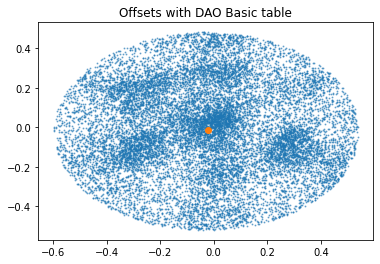

In [89]:
pl.title("Offsets with DAO Basic table")
pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(np.median(dra), np.median(ddec));

In [90]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(daoitertbl['skycoord_centroid'], 0.5*u.arcsec)
dra = (daoitertbl['skycoord_centroid'][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (daoitertbl['skycoord_centroid'][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)
print(np.median(dra), np.median(ddec))

2023-06-26T19:41:53.957328: -0.0265499arcsec -0.0174674arcsec


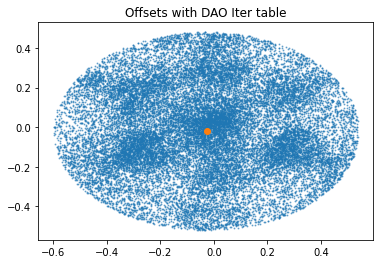

In [91]:
pl.title("Offsets with DAO Iter table")
pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(np.median(dra), np.median(ddec));

In [92]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(crowdtbl['skycoord'], 0.5*u.arcsec)
dra = (crowdtbl['skycoord'][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (crowdtbl['skycoord'][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)
print(np.median(dra), np.median(ddec))

2023-06-26T19:41:54.503936: -0.0185652arcsec -0.0130552arcsec


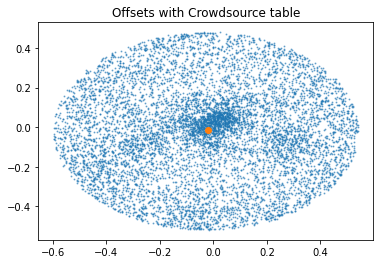

In [93]:
pl.title("Offsets with Crowdsource table")
pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(np.median(dra), np.median(ddec));

### Intermediate conclusions:

The iter table performed best but still quite poorly.  Only matches within <0.15 arcsec are remotely valid, so more source rejection is needed to get a good result.

In [94]:
satstarcat = Table.read('F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_i2d_satstar_catalog.fits')
if 'skycoord_fit' not in satstarcat.colnames:
    ww = WCS(fits.getheader('F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_i2d.fits', ext=('SCI', 1)))
    satstarcat['skycoord_fit'] = ww.pixel_to_world(satstarcat['x_fit'], satstarcat['y_fit'])
    satstarcat.write('F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_i2d_satstar_catalog.fits', overwrite=True)
satstarcat[:5]

x_0,y_0,flux_0,id,group_id,x_fit,y_fit,flux_fit,flux_unc,x_0_unc,y_0_unc,skycoord_fit
,,,,,,,,,,,"deg,deg"
float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,SkyCoord
4391.884615384615,2451.5384615384614,5172103.9607279245,1,1,4392.410381100921,2451.467502654208,28085524.20235101,137649.7152531156,0.005665931501393353,0.005228865621477726,"266.53606966927566,-28.725137719129535"
3300.0,1834.5,2291188.1279223864,1,1,3300.0375558913524,1834.2775609003252,6589903.442851549,10598.499423969617,0.002484253354646401,0.0022191707860774565,"266.52997498485763,-28.734604429337388"
6253.6,2440.4,3168398.9802444517,2,2,6253.703004614664,2440.119426164047,9985562.131255014,18155.399247218113,0.0029140811612998157,0.0022057934160892917,"266.53595078547113,-28.709010564513456"
7007.615384615385,3542.230769230769,2620921.680658946,3,3,7007.909988109659,3542.1052916995145,8274107.053985698,13600.353549125644,0.0028503997756696587,0.0021086301253187977,"266.54683379745234,-28.702471784678263"
358.5,4385.714285714285,2761253.0953494916,4,4,358.4713351000014,4385.724902517926,8488697.687774412,17046.3155229835,0.002660491423174261,0.0028896143986390987,"266.55520207370387,-28.760082294861046"


### Try to reject sources near saturated sources (about 0.4" in F4* and 0.95" (?!?!) in F1*)

In [95]:
satcrd = satstarcat['skycoord_fit']
daoitercrd = daoitertbl['skycoord_centroid']
idx_s, sidx_s, sep_s, sep3d_s = satcrd.search_around_sky(daoitertbl['skycoord_centroid'], 0.95*u.arcsec)
len(idx_s), len(sidx_s), len(sep_s), len(sep3d_s)

(5753, 5753, 5753, 5753)

In [96]:
inds = np.arange(len(daoitercrd))
unsat_inds = inds[~np.in1d(inds, idx_s)]
#daoitercrd_nosat = daoitercrd[unsat_inds]
daoitertbl_nosat = daoitertbl[unsat_inds]

In [97]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(daoitertbl['skycoord_centroid'], 0.5*u.arcsec)
sat_idx = np.isin(idx, idx_s)
dra = (daoitertbl['skycoord_centroid'][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (daoitertbl['skycoord_centroid'][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)
dra_s = (daoitertbl['skycoord_centroid'][idx[sat_idx]].ra - vvvdr2_crds[sidx[sat_idx]].ra).to(u.arcsec)
ddec_s = (daoitertbl['skycoord_centroid'][idx[sat_idx]].dec - vvvdr2_crds[sidx[sat_idx]].dec).to(u.arcsec)
print(np.median(dra), np.median(ddec))

2023-06-26T19:41:55.590496: -0.0265499arcsec -0.0174674arcsec


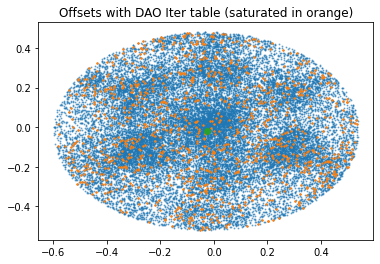

In [98]:
pl.title("Offsets with DAO Iter table (saturated in orange)")
pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(dra_s, ddec_s, s=2, alpha=1)
pl.scatter(np.median(dra), np.median(ddec));

## Try to match saturated star centroids

In [99]:
satcrd = satstarcat['skycoord_fit']
idx_s, sidx_s, sep_s, sep3d_s = satcrd.search_around_sky(vvvdr2_crds, 0.5*u.arcsec)
dra_s = (satcrd[sidx_s].ra - vvvdr2_crds[idx_s].ra).to(u.arcsec)
ddec_s = (satcrd[sidx_s].dec - vvvdr2_crds[idx_s].dec).to(u.arcsec)
len(idx_s), len(satcrd), len(vvvdr2_crds)

(82, 162, 4693)

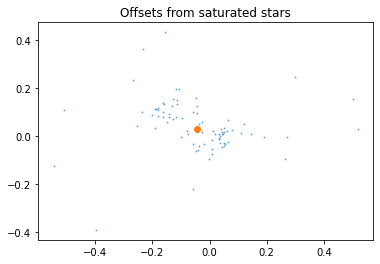

In [100]:
pl.title("Offsets from saturated stars")
pl.scatter(dra_s, ddec_s, s=1, alpha=0.5)
pl.scatter(np.median(dra_s), np.median(ddec_s));

In [101]:
# for each coordinate in DAO catalog, find VVV match (for plotting)
daoitercrd_nosat = daoitertbl_nosat['skycoord_centroid']
idx, sidx, sep, sep3d = daoitercrd_nosat.search_around_sky(vvvdr2_crds, 0.5*u.arcsec)
dra = (daoitercrd_nosat[sidx].ra - vvvdr2_crds[idx].ra).to(u.arcsec)
ddec = (daoitercrd_nosat[sidx].dec - vvvdr2_crds[idx].dec).to(u.arcsec)
len(idx), len(daoitercrd), len(vvvdr2_crds)

(25395, 161311, 4693)

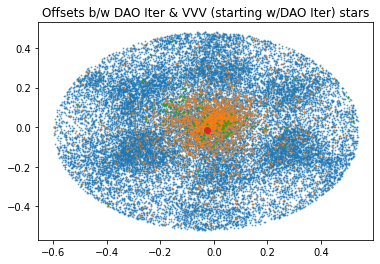

In [102]:
pl.title("Offsets b/w DAO Iter & VVV (starting w/DAO Iter) stars")
pl.scatter(dra, ddec, s=1, alpha=0.5)
bright = daoitertbl_nosat['flux_fit'][sidx] > 1e4
pl.scatter(dra[bright], ddec[bright], s=1, alpha=0.5)
pl.scatter(dra_s, ddec_s, s=2, alpha=1)
pl.scatter(np.median(dra), np.median(ddec));

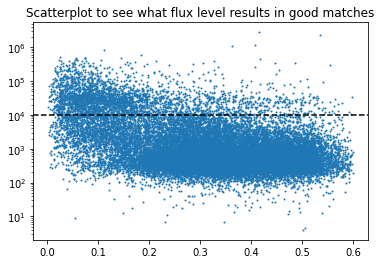

In [103]:
pl.title("Scatterplot to see what flux level results in good matches")
pl.scatter((dra**2 + ddec**2)**0.5, daoitertbl_nosat['flux_fit'][sidx], s=1)
pl.semilogy();
pl.axhline(1e4, color='k', linestyle='--');

In [104]:
# for each coordinate in DAO catalog, find VVV match (for saving)
daoitercrd_nosat = daoitertbl_nosat['skycoord_centroid']
bright = daoitertbl_nosat['flux_fit'] > 1e4
idxd, sepd, _ = daoitercrd_nosat[bright].match_to_catalog_sky(vvvdr2_crds)

drad = (daoitercrd_nosat[bright].ra - vvvdr2_crds[idxd].ra).to(u.arcsec)
ddecd = (daoitercrd_nosat[bright].dec - vvvdr2_crds[idxd].dec).to(u.arcsec)

# then, for each vvv object, find the closest DAO
idxv, sepv, _ = vvvdr2_crds.match_to_catalog_sky(daoitercrd_nosat[bright])
drav = (daoitercrd_nosat[bright][idxv].ra - vvvdr2_crds.ra).to(u.arcsec)
ddecv = (daoitercrd_nosat[bright][idxv].dec - vvvdr2_crds.dec).to(u.arcsec)

len(idxd), len(idxv), bright.sum(), len(vvvdr2_crds)

(5427, 4693, 5427, 4693)

(-0.5, 0.5, -0.5, 0.5)

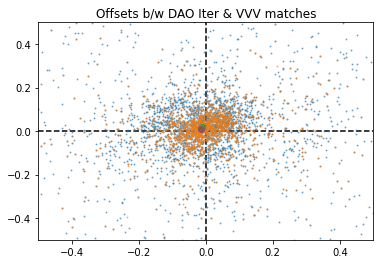

In [105]:
pl.title("Offsets b/w DAO Iter & VVV matches")
pl.scatter(drad, ddecd, s=1, alpha=0.5)
pl.scatter(drav, ddecv, s=1, alpha=0.5)
pl.scatter(np.median(drad), np.median(ddecd));
pl.scatter(np.median(drav), np.median(ddecv));
pl.scatter(np.median(drad[sepd<0.15*u.arcsec]), np.median(ddecd[sepd<0.15*u.arcsec]));
pl.scatter(np.median(drav[sepv<0.15*u.arcsec]), np.median(ddecv[sepv<0.15*u.arcsec]));
pl.axhline(0, color='k', linestyle='--', zorder=-5)
pl.axvline(0, color='k', linestyle='--', zorder=-5);
pl.axis([-0.5,0.5,-0.5,0.5])

# Conclusions again: There's no offset?

So, what the hell?  Why do the catalogs _look_ so offset when overlaid on the data?

Maybe it's just that the catalogs have never run to completion on the final data.

## Revisiting VVV x-matching June 28, 2023

Examining the VVV catalog overlaid on the realigned catalogs in `refcat_to_410_check` in CARTA, it looks like there are very few stars that actually get matched to JWST stars reasonably.

So a more careful treatment of the x-matching is needed.


Manual inspection, going 12..13, 14..15, etc., the first magnitude bin that is OK for F410M is 15..16, so >15 seems appropriate.

For F405N, though, >11 mag works

# Some plots for the paper

todo - show that offset ~ zero

In [106]:
basepath = '/orange/adamginsburg/jwst/brick/'

In [107]:
import sys
if '' in sys.path:
    sys.path.remove('')

In [108]:
%run $basepath/analysis/analysis_setup.py
basetable = basetable_merged

2023-06-26 19:41:57,727 - stpipe - WARNING - /orange/adamginsburg/jwst/brick/analysis/analysis_setup.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import sys, imp

2023-06-26 19:42:03,016 - stpipe - WARNING - /orange/adamginsburg/jwst/brick//reduction/filtering.py:20: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm

2023-06-26 19:42:15,165 - stpipe - WARNING - /blue/adamginsburg/adamginsburg/repos/astropy/astropy/wcs/wcs.py:819: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to   -51.508342 from OBSGEO-[XYZ].
Set OBSGEO-B to   -20.646359 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526234830.949 from OBSGEO-[XYZ]'.
  warnings.warn(

2023-06-26 19:42:15,185 - stpipe - WARNING - /blue/adamginsburg/adamginsburg/repos/astropy/astropy/wcs/wcs.py:819: FITSFixedWarning: 'ob

<Figure size 1000x800 with 0 Axes>

In [109]:
%run $basepath/analysis/selections.py --module=merged
assert len(basetable) == len(basetable_merged)

Selecting module merged
466 saturated in near_saturated_f212n_f212n
34 saturated in near_saturated_f466n_f466n
540 saturated in near_saturated_f405n_f405n
263 saturated in near_saturated_f187n_f187n
3603 saturated in near_saturated_f182m_f182m
5723 near saturated out of 289206.  That leaves 283483 not near unsaturated
55 saturated in replaced_saturated_f212n
9 saturated in replaced_saturated_f466n
188 saturated in replaced_saturated_f405n
21 saturated in replaced_saturated_f187n
118 saturated in replaced_saturated_f182m
638 saturated out of 289206.  That leaves 288568 unsaturated
Filter f410m has qf=61931, spread=68644, fracflux=47462 ok, totaling 45239.  There are 289206 total, of which 227768 are masked and 61438 are unmasked. qfmasksum=218119, inverse=71087.
Filter f212n has qf=119083, spread=123918, fracflux=101776 ok, totaling 101280.  There are 289206 total, of which 167595 are masked and 121611 are unmasked. qfmasksum=164831, inverse=124375.
Filter f466n has qf=46231, spread=503

In [110]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(basetable['skycoord_f410m'], 0.5*u.arcsec)
dra = (basetable['skycoord_f410m'][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (basetable['skycoord_f410m'][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)
print(np.median(dra), np.median(ddec))

2023-06-26T19:42:51.650006: -0.0064999arcsec 0.00328813arcsec


In [111]:
%run $basepath/reduction/align_to_catalogs.py

In [112]:
vvvdr2_crds, vvvdr2 = retrieve_vvv(basepath=basepath, filtername=filtername, module='merged',
                                   fov_regname='regions/nircam_brick_fov.reg')
reference_coordinates = vvvdr2_crds

In [113]:
skycrds_cat = basetable['skycoord_f410m']
skycrds_cat_a = basetable_nrca['skycoord_f410m']
skycrds_cat_b = basetable_nrcb['skycoord_f410m']
idx, sidx, sep, sep3d = reference_coordinates.search_around_sky(skycrds_cat[all_good], 0.4*u.arcsec)
idxa, sidxa, sepa, sep3da = reference_coordinates.search_around_sky(skycrds_cat_a[all_good_a], 0.4*u.arcsec)
idxb, sidxb, sepb, sep3db = reference_coordinates.search_around_sky(skycrds_cat_b[all_good_b], 0.4*u.arcsec)

In [114]:
len(skycrds_cat), len(basetable), len(vvvdr2), sel.sum(), idx.max(), sidx.max()

(530916, 530916, 4693, 778, 50197, 4687)

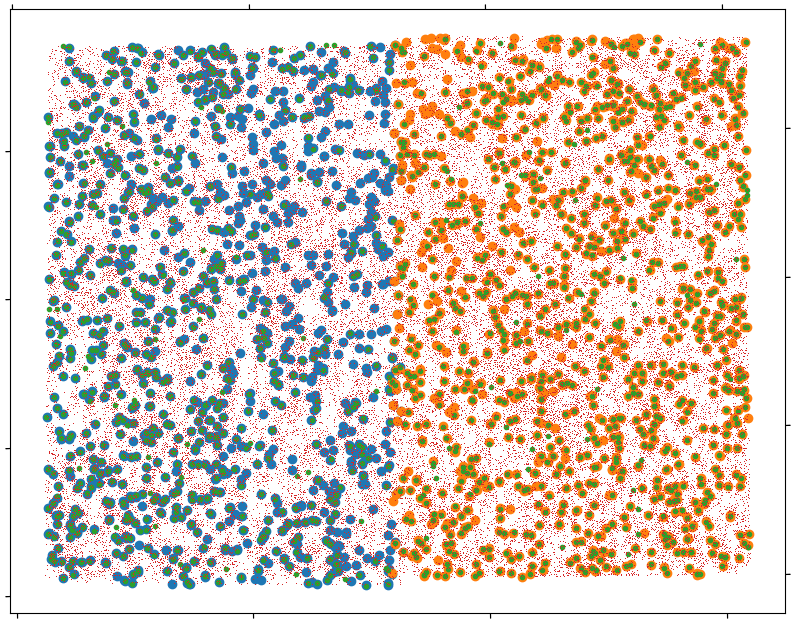

In [115]:
ax = pl.subplot(projection=ww_merged)
ax.plot_coord(skycrds_cat_a[all_good_a][idxa], 'o')
ax.plot_coord(skycrds_cat_b[all_good_b][idxb], 'o')
ax.plot_coord(vvvdr2_crds[sidx], '.')
ax.plot_coord(skycrds_cat[all_good], ',')

# Flux Calibration Check

### F212 vs VVVK plot

There are significant differences betwen NRCA, NRCB, and merged.

They are strict offsets in magnitude, so I guess multiplicative?

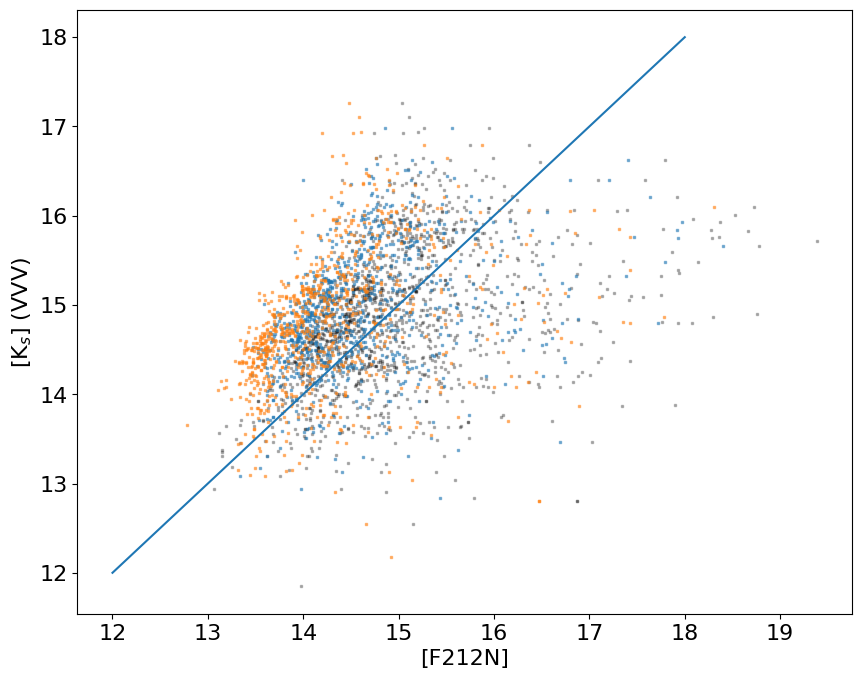

In [116]:
pl.scatter(basetable['mag_ab_f212n'][all_good][idx], vvvdr2['Ksmag3'][sidx], marker=',', s=1, alpha=0.25, color='k')
pl.scatter(basetable_nrca['mag_ab_f212n'][all_good_a][idxa], vvvdr2['Ksmag3'][sidxa], marker=',', s=3, alpha=0.5)
pl.scatter(basetable_nrcb['mag_ab_f212n'][all_good_b][idxb], vvvdr2['Ksmag3'][sidxb], marker=',', s=3, alpha=0.5)
pl.plot([12,18], [12,18])
pl.xlabel("[F212N]")
pl.ylabel("[K$_s$] (VVV)");